## Lending Club Case Study - Shashank Pawaskar
#### Introduction -
Lending Club is a marketplace for personal loans that matches borrowers who are seeking loan with investers looking to lend money and make a return.
#### Problem Statement - 
When the company receives a loan application, the company has to make a decision for loan approval based on the applicant's profile. Two types of risks are associated with the lender's decision:
1. If the applicant likely to repay the loan, the not approving the loan is a loss of business to the company.
2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.
#### Key Objective - 
- Understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. Company can utilize this knowledge for its portfolio and risk assessment.

#### Approach
1. Data Understanding
2. Data Validation & Preparation
3. Data Visualization for understanding the factors
4. Observations & Recommendations

#### Import the libraries required the analysis

In [156]:
# Importing all the required libraries for the case study
import numpy as np               #version 1.21.5
import pandas as pd              #version 1.5.3
import matplotlib.pyplot as plt  #version 3.5.2
import seaborn as sns            #version 0.11.2
import plotly.express as px      #version 5.9.0
import warnings                  #version 
warnings.filterwarnings('ignore')

Note: Use 'pip show "library"' to know the version of the imported libraries

#### Import the Case Study CSV File into a Dataframe

In [157]:
#import the CSV File
ld = pd.read_csv("loan.csv")

In [158]:
#check for top 5 rows, and confirm data is imported in the dataframe
ld.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### Loan Data - Information

In [159]:
# Check the overall information of the data imported
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [160]:
# Check for Columns in the loan data
ld.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [161]:
#check the data types of columns
ld.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [162]:
#check using describe function
ld.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


## Data Validation & Preparation

#### Check for Null values

In [78]:
# View the Data Dictionary and check for null values
ld.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

Observation -- There are Columns with all values as null.

In [79]:
#lets list the columns with all null values these columns from the dataframe and assign it to a list
ld.columns[ld.isnull().all()]

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [163]:
# Drop these columns with all null values
ld.dropna(axis = 1, how = 'all', inplace = True)

In [34]:
#Now check whether columns with all null values still exist
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

Observation -  Now we have 57 columns remaining

In [164]:
#check what is percentage of data still with null values
(ld.isnull().sum().sum())/(ld.shape[0]*ld.shape[1])

0.05240850950297919

#### Observation -  Now only 5% of the data is null, lets check how columns remain in the dataframe

In [165]:
# Lets check whether there are any rows with all null values
ld.isnull().all(axis=1).sum()

0

Observation - We do not have any rows with all null values.

In [166]:
#Finding percentage of null or missing values
null_perc = round(100*(ld.isnull().sum()/len(ld.index)), 2)
#Printing columns which have more than 0% missing values
null_perc[ null_perc > 0 ]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
mths_since_last_delinq        64.66
mths_since_last_record        92.99
revol_util                     0.13
last_pymnt_d                   0.18
next_pymnt_d                  97.13
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

Observation - columns(desc, mths_since_last_delinq,mths_since_last_record, next_pymnt_d) have more than 30% null values, hence not useful for analysis.

In [167]:
# Removing columns (desc, mths_since_last_delinq,mths_since_last_record, next_pymnt_d  ) which has more than 30% null values in it.
ld.drop(null_perc[ null_perc > 30 ].index, axis=1, inplace=True)

In [85]:
# Now check to confirm whether the columns have been dropped
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

#### Check of Unique Data

In [168]:
#checking for Columns Unique values
ld.nunique().sort_values(ascending=True).head(53)

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

Observaton - "tax_liens, delinq_amnt, chargeoff_within_12_mths, acc_now_delinq, application_type, policy_code, collections_12_mths_ex_med, initial_list_status, pymnt_plan"  columns are single value columns and connot contribute for the for the analysis.


In [169]:
# Drop the single valued columns
ld.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'pymnt_plan', 'initial_list_status'], axis = 1, inplace = True)
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

Observation - Now we have 48 columns for analysis

#### Drop Data Columns - which are not relevant, based on the objective of the case study

In [170]:
# Removing other irrelevant columns which have no relevance to the analysis
# Removing title, emp_title, url 
ld=ld.drop(['title','emp_title', 'url', 'zip_code', 'member_id'],axis=1)
# zip_code is masked and id is already a index, hence removing member_id

In [171]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   loan_amnt                39717 non-null  int64  
 2   funded_amnt              39717 non-null  int64  
 3   funded_amnt_inv          39717 non-null  float64
 4   term                     39717 non-null  object 
 5   int_rate                 39717 non-null  object 
 6   installment              39717 non-null  float64
 7   grade                    39717 non-null  object 
 8   sub_grade                39717 non-null  object 
 9   emp_length               38642 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

Checking for Loan Status Column - As it is very relevant for our analysis

In [191]:
print("Loan Status Check")
print(ld.loan_status.value_counts())
# Loan status is Fully Paid, Charged Off and Current. Current status is for the applicant who have availed loan 
# and are repaying on-time, while the Charged Off status indicates the defaulters.
# Fully Paid are the ones who have closed the loan.


Loan Status Check
Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64


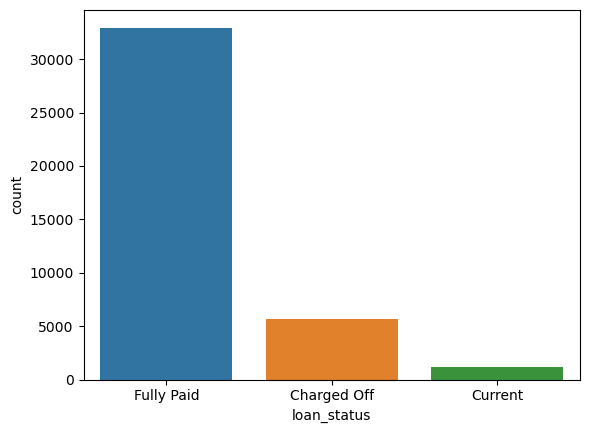

In [91]:
# Plotting to compare the rows against each of the status
sns.countplot(x = 'loan_status', data = ld)
plt.show()

In [192]:
# Exclude the rows with loan_status = 'Current', as out goal  is to see who is likely to default and this can only be said in case of either fully paid or charged off loans.
ld = ld[ld.loan_status != "Current"]
ld.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [193]:
ld.shape

(38577, 39)

In [194]:
# Since most of the loans are fully paid, check on the % of loans - status wise
(ld.loan_status.value_counts()*100)/len(ld)
# Approx. 83% of the loans are fully paid
# approx. 14% are defaulters

Fully Paid     85.413588
Charged Off    14.586412
Name: loan_status, dtype: float64

In [195]:
# Check What is the purpose for which loans are being availed.
print("Purpose of Loan")
print(ld.purpose.value_counts())

Purpose of Loan
debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64


In [196]:
#Check percentage of the Purpose for which the loans have been availed.
(ld.purpose.value_counts()*100)/len(ld)

debt_consolidation    46.802499
credit_card           13.031081
other                 10.018923
home_improvement       7.452627
major_purchase         5.573269
small_business         4.546751
car                    3.885735
wedding                2.400394
medical                1.765301
moving                 1.493118
vacation               0.972082
house                  0.951344
educational            0.842471
renewable_energy       0.264406
Name: purpose, dtype: float64

Check for Columns which require updates (background - we still have some columns with NULL values)

In [197]:
#check datatypes and see whether there numberic fields all 0's
print(ld.isnull().sum().sort_values(ascending=False))

last_pymnt_d               71
last_credit_pull_d          2
id                          0
total_pymnt                 0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
out_prncp                   0
out_prncp_inv               0
total_rec_prncp             0
total_pymnt_inv             0
inq_last_6mths              0
total_rec_int               0
total_rec_late_fee          0
recoveries                  0
collection_recovery_fee     0
last_pymnt_amnt             0
open_acc                    0
earliest_cr_line            0
loan_amnt                   0
emp_length                  0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
delinq_2yrs                 0
annual_inc                  0
verification_status         0
issue_d   

In [198]:
#check for Public Record of bankruptcies, 
print(ld['pub_rec_bankruptcies'].unique())

[0.0 1.0 2.0 'UnKnown']


In [199]:
# Check for total rows with null Public Bankruptcies column
print(ld.pub_rec_bankruptcies.isnull().sum())

0


In [200]:
#Assuming that these nulls are due to the fact there is no known bankruptcies, update the nulls with "Unknown"
ld.pub_rec_bankruptcies.fillna('UnKnown',inplace=True)
#Check after filling the nulls
print(ld.pub_rec_bankruptcies.isnull().sum())

0


In [201]:
#Check for emp_length
print(ld['emp_length'].unique())

['10+ years' '< 1 year' '3 years' '8 years' '9 years' '4 years' '5 years'
 '1 year' '6 years' '2 years' '7 years']


In [202]:
# Check for total rows with null emp_length column
print(ld.emp_length.isnull().sum())

0


In [203]:
# Assumption - Loans with null values emp_length have '< 1 year' experience
ld.emp_length.fillna('< 1 year',inplace=True)

In [204]:
# Check for revol_util
print(ld.revol_util.isnull().sum())

0


In [205]:
# Check for unique values
print(ld['revol_util'].unique())

['83.70%' '9.40%' '98.50%' ... '49.63%' '0.04%' '7.28%']


In [206]:
# Assumption - laons with null revol_util have value of '0.00%'
ld.revol_util.fillna('0.00%',inplace=True)

In [207]:
# Checking for missing values across the dataframe
print(ld.isnull().sum())

id                          0
loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
addr_state                  0
dti                         0
delinq_2yrs                 0
earliest_cr_line            0
inq_last_6mths              0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
out_prncp                   0
out_prncp_inv               0
total_pymnt                 0
total_pymnt_inv             0
total_rec_prncp             0
total_rec_int               0
total_rec_late_fee          0
recoveries

last_pymnt_d and last_credit_pull_d can be null as these have date values.

#### Adding derived columns
- Adding columns and converting them to relevant datatype
- Change relevant columns to category data type 
- Add Category Columns for numeric columns
Note : We will be adding some columns without changing the original columns.

In [211]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         38577 non-null  int64         
 1   loan_amnt                  38577 non-null  int64         
 2   funded_amnt                38577 non-null  int64         
 3   funded_amnt_inv            38577 non-null  float64       
 4   term                       38577 non-null  object        
 5   int_rate                   38577 non-null  object        
 6   installment                38577 non-null  float64       
 7   grade                      38577 non-null  object        
 8   sub_grade                  38577 non-null  object        
 9   emp_length                 38577 non-null  object        
 10  home_ownership             38577 non-null  object        
 11  annual_inc                 38577 non-null  int32         
 12  veri

In [209]:
# Correcting the data types and adding columns 
ld['pub_rec_bankruptcies_dive'] = ld.pub_rec_bankruptcies
ld['pub_rec_bankruptcies_dive'].replace(['UnKnown'], ['0.0'], inplace=True)
ld.pub_rec_bankruptcies_dive = ld.pub_rec_bankruptcies_dive.apply(pd.to_numeric)
ld['int_rate_dive'] = ld['int_rate'].str.rstrip('%')
ld.int_rate_dive = ld.int_rate_dive.apply(pd.to_numeric)
ld['revol_util_dive'] = ld['revol_util'].str.rstrip('%')
ld.revol_util_dive = ld.revol_util_dive.apply(pd.to_numeric)
ld['emp_length_dive']=ld.emp_length.str.extract('(\d+)')
ld.emp_length_dive = ld.emp_length_dive.apply(pd.to_numeric)
ld['annual_inc'] = ld['annual_inc'].astype(int)
ld['issue_d'] = pd.to_datetime(ld.issue_d.str.upper(), format='%b-%y', yearfirst=False)
ld['issue_d_yr'] = ld.issue_d.dt.year
ld['issue_d_mth'] = ld.issue_d.dt.strftime('%b')
ld['earliest_cr_line'] = pd.to_datetime(ld.earliest_cr_line.str.upper(), format='%b-%y', yearfirst=False)
ld['earliest_cr_line_yr'] = ld.earliest_cr_line.dt.year
ld['earliest_cr_line_mth'] = ld.earliest_cr_line.dt.strftime('%b')
ld['loan_status_dive'] = ld['loan_status']
ld['loan_status_dive'].replace(['Fully Paid','Charged Off'],[0, 1], inplace=True)
ld['loan_status_dive'] = ld['loan_status_dive'].astype(int)

In [210]:
ld['last_pymnt_d'] = pd.to_datetime(ld.last_pymnt_d.str.upper(), format='%b-%y', yearfirst=False)
ld['last_credit_pull_d'] = pd.to_datetime(ld.last_credit_pull_d.str.upper(), format='%b-%y', yearfirst=False)

In [126]:
# List the columns now
ld.shape

(38577, 48)

Define Columns with Category values as category data type

In [213]:
# Columns - loan_status, purpose, addr_state, home_ownership, verification_status, grade
ld.loan_status=ld.loan_status.astype('category')
ld.purpose=ld.purpose.astype('category')
ld.addr_state=ld.addr_state.astype('category')
ld.home_ownership=ld.home_ownership.astype('category')
ld.verification_status=ld.verification_status.astype('category')
ld.grade=ld.grade.astype('category')

Adding derived Catefory Columns for analysis

In [214]:
# Creating Annual Income Categorical data
cut_bins = [0, 5000, 10000, 20000, 30000, 50000, 75000, 100000, 200000, 300000, 500000, 800000, 1000000, 1500000, 2000000]
cut_lables = ['0 - 5000', '5000 - 10000', '10000 - 20000', '20000 - 30000', '30000 - 50000', '50000 - 75000', '75000 - 100000', '100000 - 200000', '200000 - 300000', '300000 - 500000', '500000 - 800000', '800000 - 1000000', '1000000 - 1500000', ' > 1500000']
ld['annual_inc_dive'] = pd.cut(x=ld['annual_inc'], bins = cut_bins, labels = cut_lables)

In [215]:
# Create categorical derived column for Interest Rate
ld['int_rate_dive2'] = pd.cut(ld['int_rate_dive'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])

In [216]:
# Create categorical Derived Column for Open_acc
ld['open_acc_dive'] = pd.cut(ld['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])

In [217]:
#Create categorical derived column for revol_util
ld['revol_util_dive2'] = pd.cut(ld['revol_util_dive'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])

In [218]:
#Create categorical derived column for total_acc_dive
ld['total_acc_dive'] = pd.cut(ld['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])

In [220]:
ld['installment_dive'] = pd.cut(ld['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
ld['funded_amnt_inv_dive'] = pd.cut(ld['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
ld['funded_amnt_dive'] = pd.cut(ld['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
ld['loan_amnt_dive'] = pd.cut(ld['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
ld['dti_dive'] = pd.cut(ld['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

#### Important Points to note, w.r.t the Loan Amounts.
- funded_amnt - The total amount committed to that loan at that point in time.
- funded_amnt_inv - The total amount committed by investors for that loan at that point in time.
- loan_amnt -  The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

In [222]:
#check whether all derived columns have been added.
ld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 59 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         38577 non-null  int64         
 1   loan_amnt                  38577 non-null  int64         
 2   funded_amnt                38577 non-null  int64         
 3   funded_amnt_inv            38577 non-null  float64       
 4   term                       38577 non-null  object        
 5   int_rate                   38577 non-null  object        
 6   installment                38577 non-null  float64       
 7   grade                      38577 non-null  category      
 8   sub_grade                  38577 non-null  object        
 9   emp_length                 38577 non-null  object        
 10  home_ownership             38577 non-null  category      
 11  annual_inc                 38577 non-null  int32         
 12  veri

In [223]:
ld.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'pub_rec_bankruptcies_dive', 'int_rate_dive',
       'revol_util_dive', 'emp_length_dive', 'issue_d_yr', 'issue_d_mth',
       'earliest_cr_line_yr', 'earliest_cr_line_mth', 'loan_status_dive',
       'annual_inc_dive', 'int_rate_dive2', 'open_acc_dive',
       'revol_util_dive2', 'total_acc_dive', 'installment_dive',
       'funde

In [226]:
ld.shape

(38577, 59)

#### Checking for Outliers

<AxesSubplot:xlabel='annual_inc'>

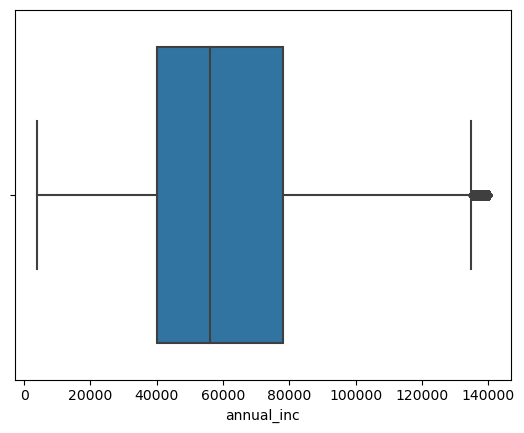

In [234]:
## Column - annual_inc
sns.boxplot(ld['annual_inc'])

Observation - The max value is 6M, lets check for percentiles of 0.95 and 0.99 before taking decision on what to retain.

In [229]:
# checking the percentile for annual_inc
ld.annual_inc.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
5%       2.400000e+04
10%      3.000000e+04
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
90%      1.150000e+05
95%      1.400040e+05
99%      2.341440e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

Observation - annual_inc - 0.99 percentile is almost double of than that at 0.95 percentile. Hence we will consider annual inc less than or equal to 0.85 percentile

In [232]:
# Taking decision to selecting annual_inc less than or equal to 0.95 quantile value
annual_inc_95_quantile = ld['annual_inc'].quantile(0.95)
ld = ld[ld.annual_inc <= annual_inc_95_quantile]

In [233]:
ld.shape

(36654, 59)

<AxesSubplot:xlabel='loan_amnt'>

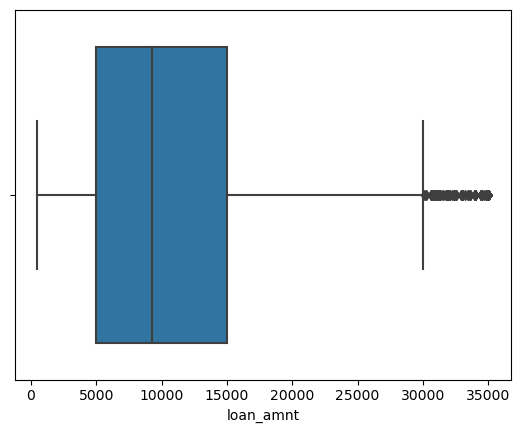

In [68]:
# Column - loan_amnt
sns.boxplot(ld['loan_amnt'])

In [235]:
# Checking percentiles for loan_amnt
ld.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    20000.0
0.950    25000.0
0.970    25475.0
0.975    28000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

Observation - The data seems to be continous and not as what we have seen in annual_inc, hence taking no action.

<AxesSubplot:xlabel='dti'>

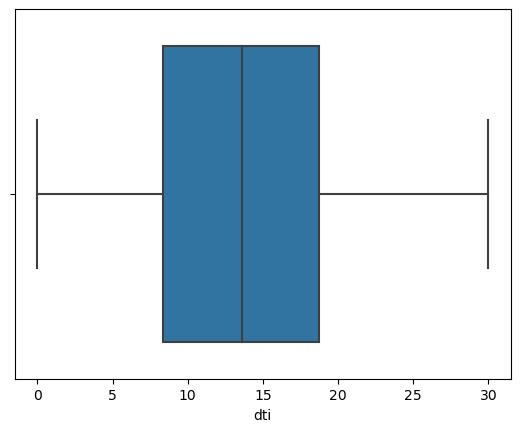

In [71]:
# Column - dti
sns.boxplot(ld['dti'])

In [236]:
# though there are no outliers for dti, we still check the data continuity
ld.dti.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    18.7100
0.900    22.3900
0.950    23.8535
0.970    24.5400
0.975    24.7000
0.980    24.8800
0.990    26.6494
1.000    29.9900
Name: dti, dtype: float64

Observation - No Outliers for DTI.

In [237]:
# check laon data information
ld.shape

(36654, 59)

In [238]:
# Creating Dataframe for Charged off Loans only, for specific analysis of charged off loans.
Charged_off_df = ld[ld.loan_status == 'Charged Off']
Charged_off_df.shape

(5418, 59)

#### Ending Data Validation and Preparation 

## Univariate Analysis

Text(0.5, 1.0, 'Loan Status')

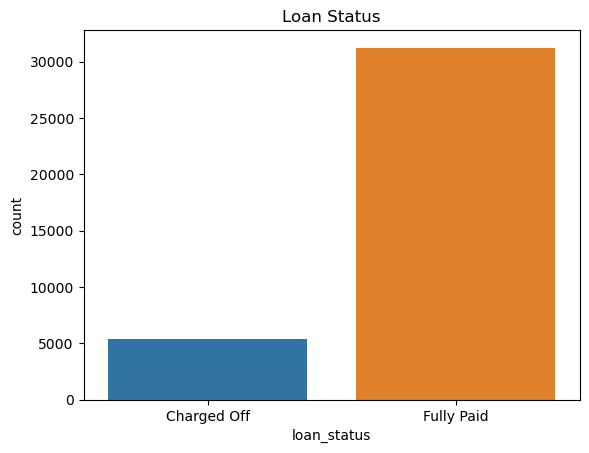

In [241]:
# Loan Status
sns.countplot(ld.loan_status)
plt.title('Loan Status')

Observation - Fully Paid Loans are high in numbers when compared to Charged Off loans.

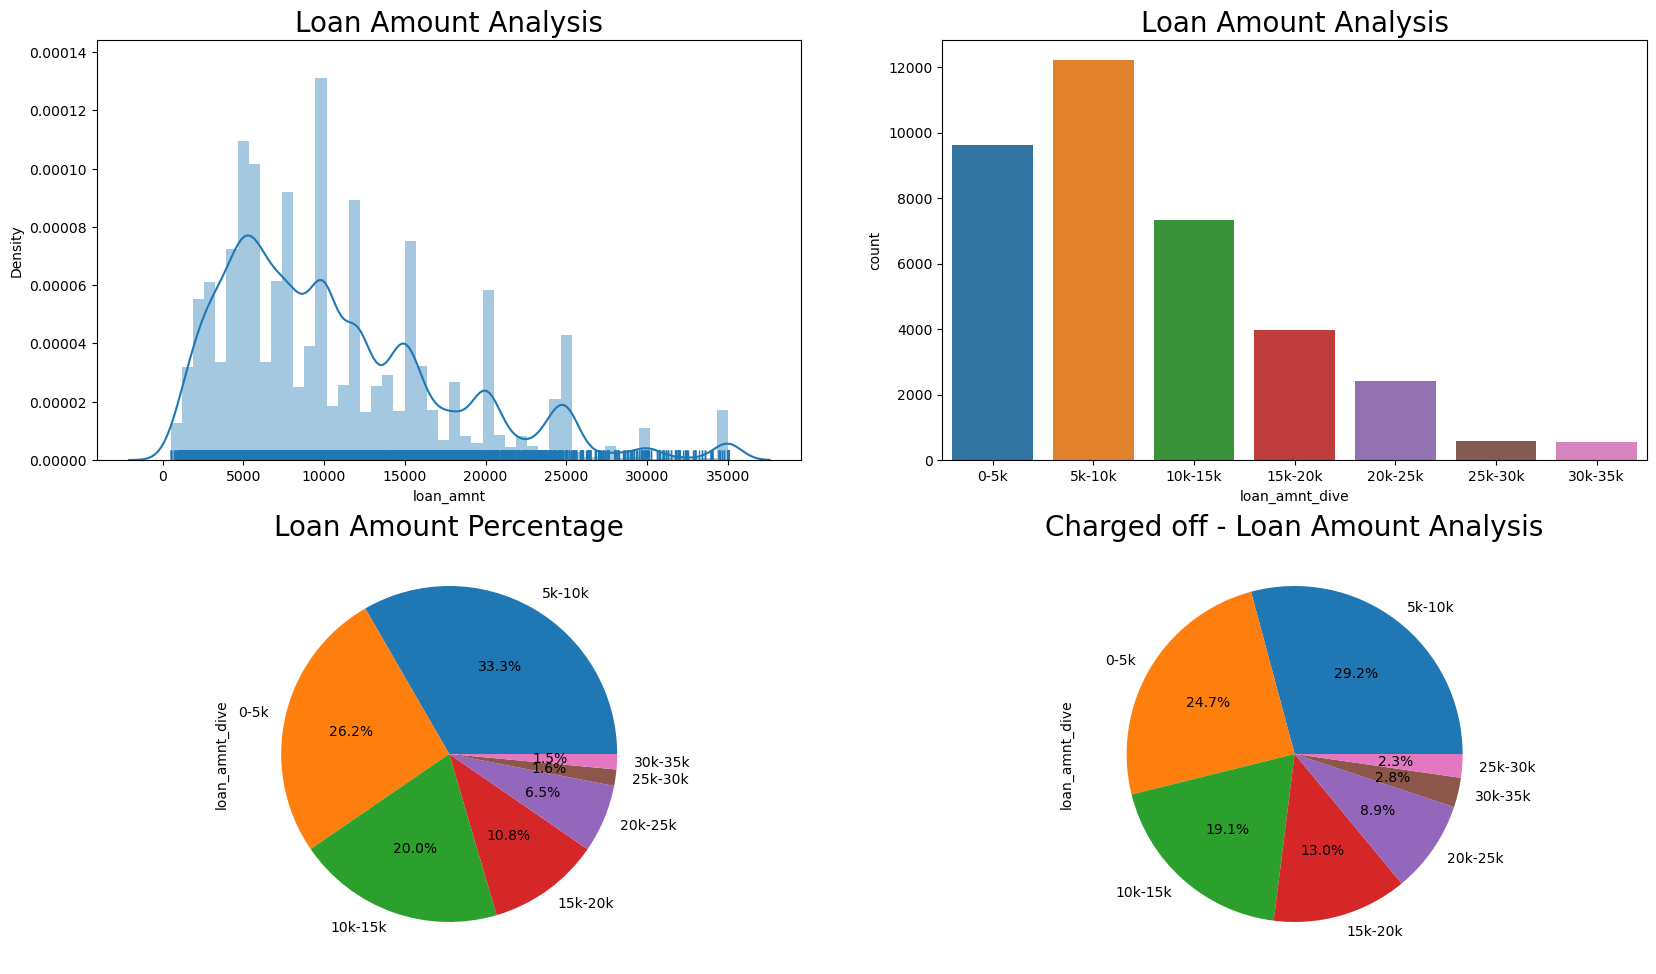

In [393]:
# Loan Amount 
plt.figure(figsize=(20,12))
#Setting subplot index
plt.subplot(2,2,1)
sns.distplot(a=ld.loan_amnt, rug=True)
plt.title('Loan Amount Analysis', size=20)

plt.subplot(2,2,2)
sns.countplot(x='loan_amnt_dive', data=ld)
plt.title('Loan Amount Analysis', size=20)

plt.subplot(2,2,3)
ld['loan_amnt_dive'].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title('Loan Amount Percentage', size=20)
# Charge Off Loans
plt.subplot(2,2,4)
#sns.countplot(x='loan_amnt_dive', data=Charged_off_df)
Charged_off_df['loan_amnt_dive'].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title('Charged off - Loan Amount Analysis', size=20)



plt.show()

In [243]:
# Check min, mean, max of loan_amnt
ld.loan_amnt.describe()

count    36654.000000
mean     10682.249550
std       7048.414166
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

Observation 
- Loan amount varies between 500 to 35k, with average at 9250
- Majority of Applicants availed loan amount between 500 -  10k
- Charged Off Loans
    - Charged Off loans count is higher for loan amount range between 500 - 10k loan amount.

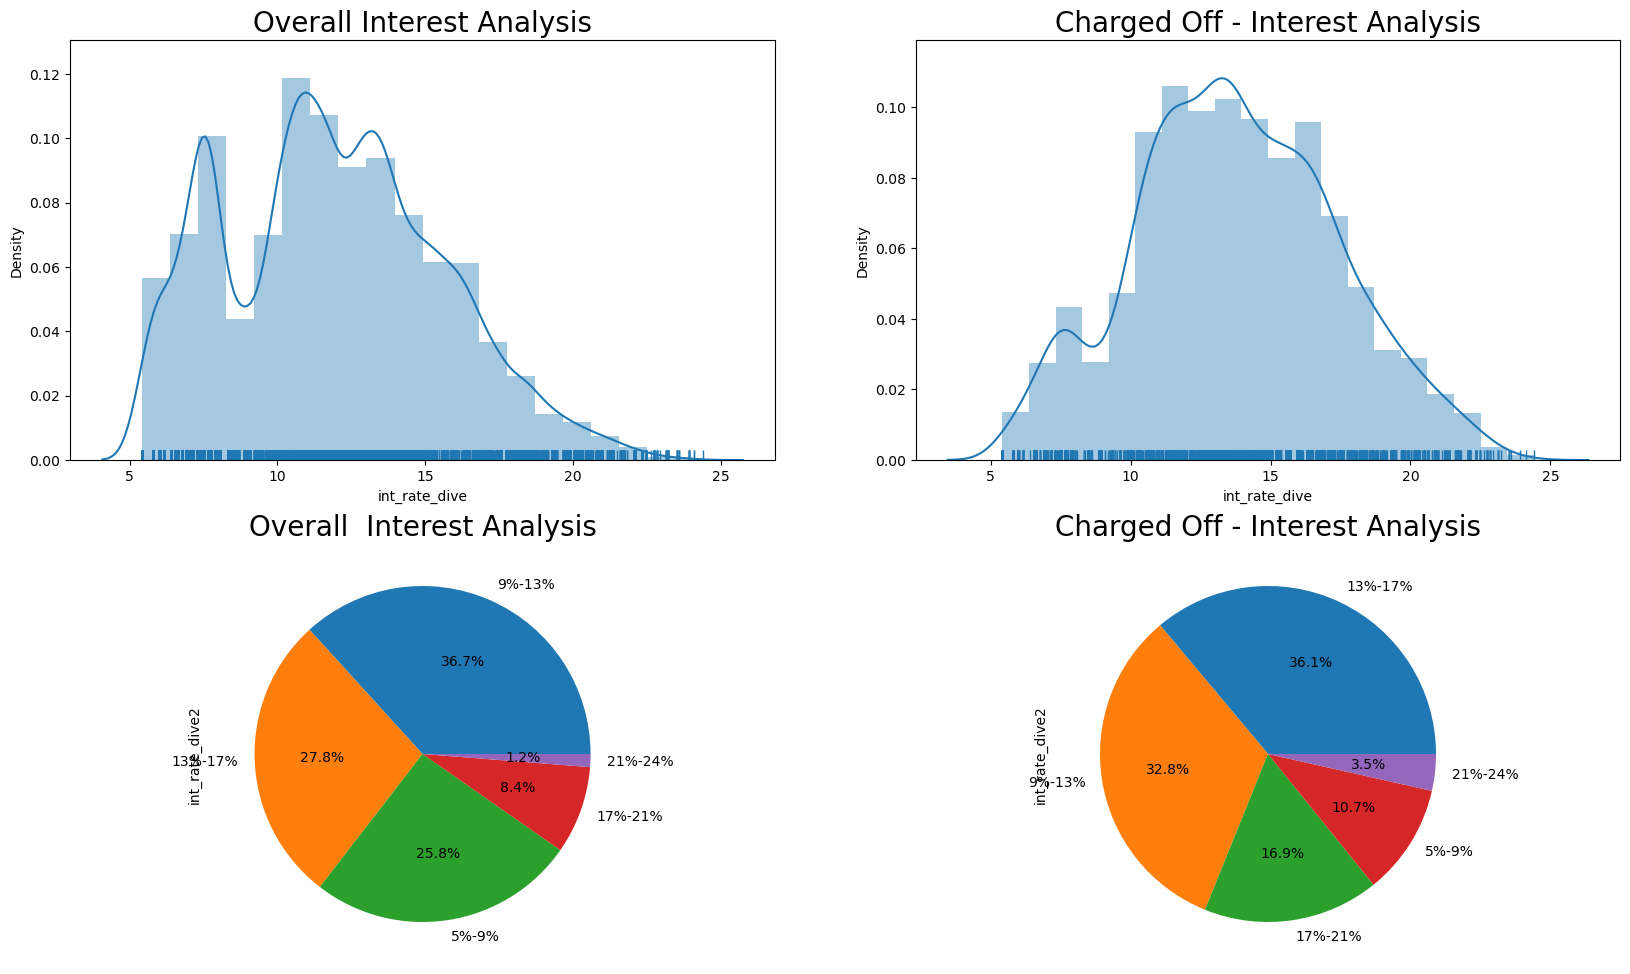

In [402]:
#int_rate Column
# using the derived column (int_rate_dive) for int_rate.
plt.figure(figsize=(20,12))
#Setting subplot index
plt.subplot(2,2,1)
sns.distplot(a=ld.int_rate_dive, rug=True, kde=True, bins=20)
plt.title('Overall Interest Analysis',size=20)
# Charged Off Loans
plt.subplot(2,2,2)
sns.distplot(a=Charged_off_df.int_rate_dive, rug=True, kde=True, bins=20)

plt.title('Charged Off - Interest Analysis',size=20)
# OVerall Loans
plt.subplot(2,2,3)
ld['int_rate_dive2'].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title('Overall  Interest Analysis',size=20)
# Charged Off Loans
plt.subplot(2,2,4)
Charged_off_df['int_rate_dive2'].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title('Charged Off - Interest Analysis',size=20)
plt.show()


In [ ]:
Observation
- Overall Loan Data indicates the interest rate peaking at 10%
- More than 50% of the loans are in 5% - 13% interest Rate Range.
- Charged Off Loan Data Set indicates interest peaking aroung 15%, which is higher than the trend noticed overall. 
    - Higher interest rate for Charged Off Loans can be a reason for Default.
    - Around 50% of Charged Off Loans are in 13% - 21% interest rate range.

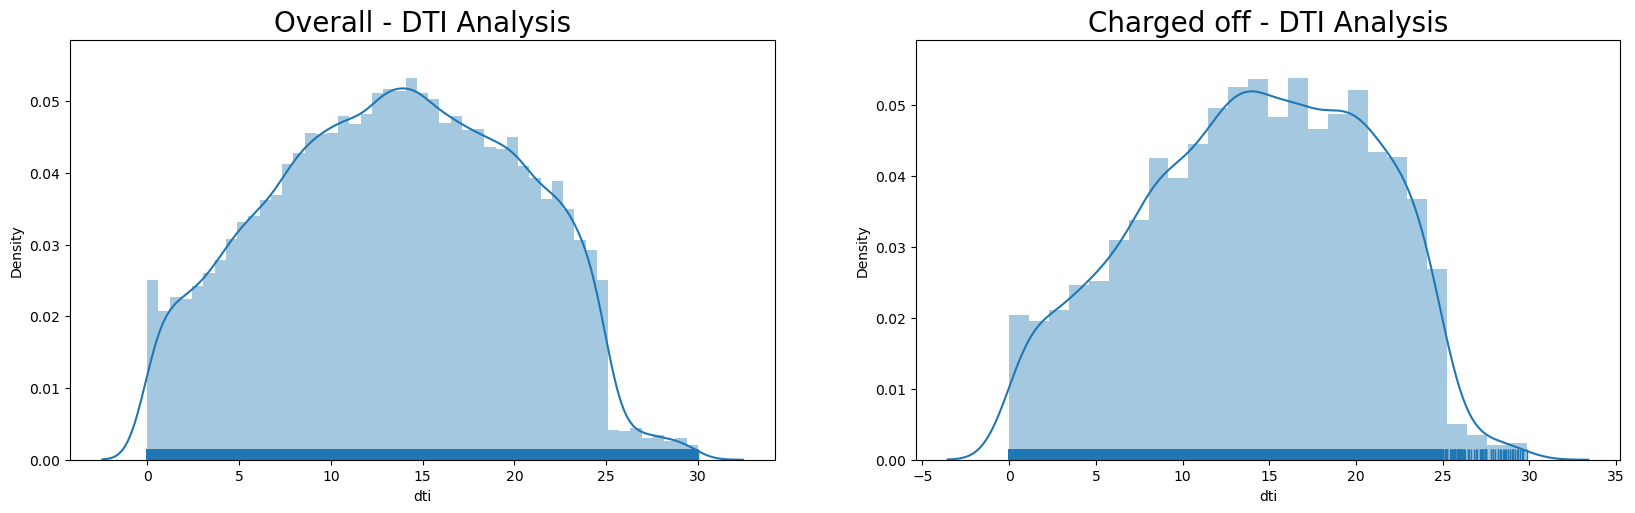

In [404]:
#dti
plt.figure(figsize=(20,12))
#Setting subplot index
plt.subplot(2,2,1)
sns.distplot(a=ld.dti, rug=True)
plt.title('Overall - DTI Analysis', size=20)

# Charged off Loans
plt.subplot(2,2,2)
sns.distplot(a=Charged_off_df.dti, rug=True)
plt.title('Charged off - DTI Analysis', size=20)

plt.show()

Observation 
- DTI has clear bell curve and people with average imcome have highest monthly debt.
- Charged Off Loans
    - Majority of the Defaulters are between range of 12- 18 DTI.

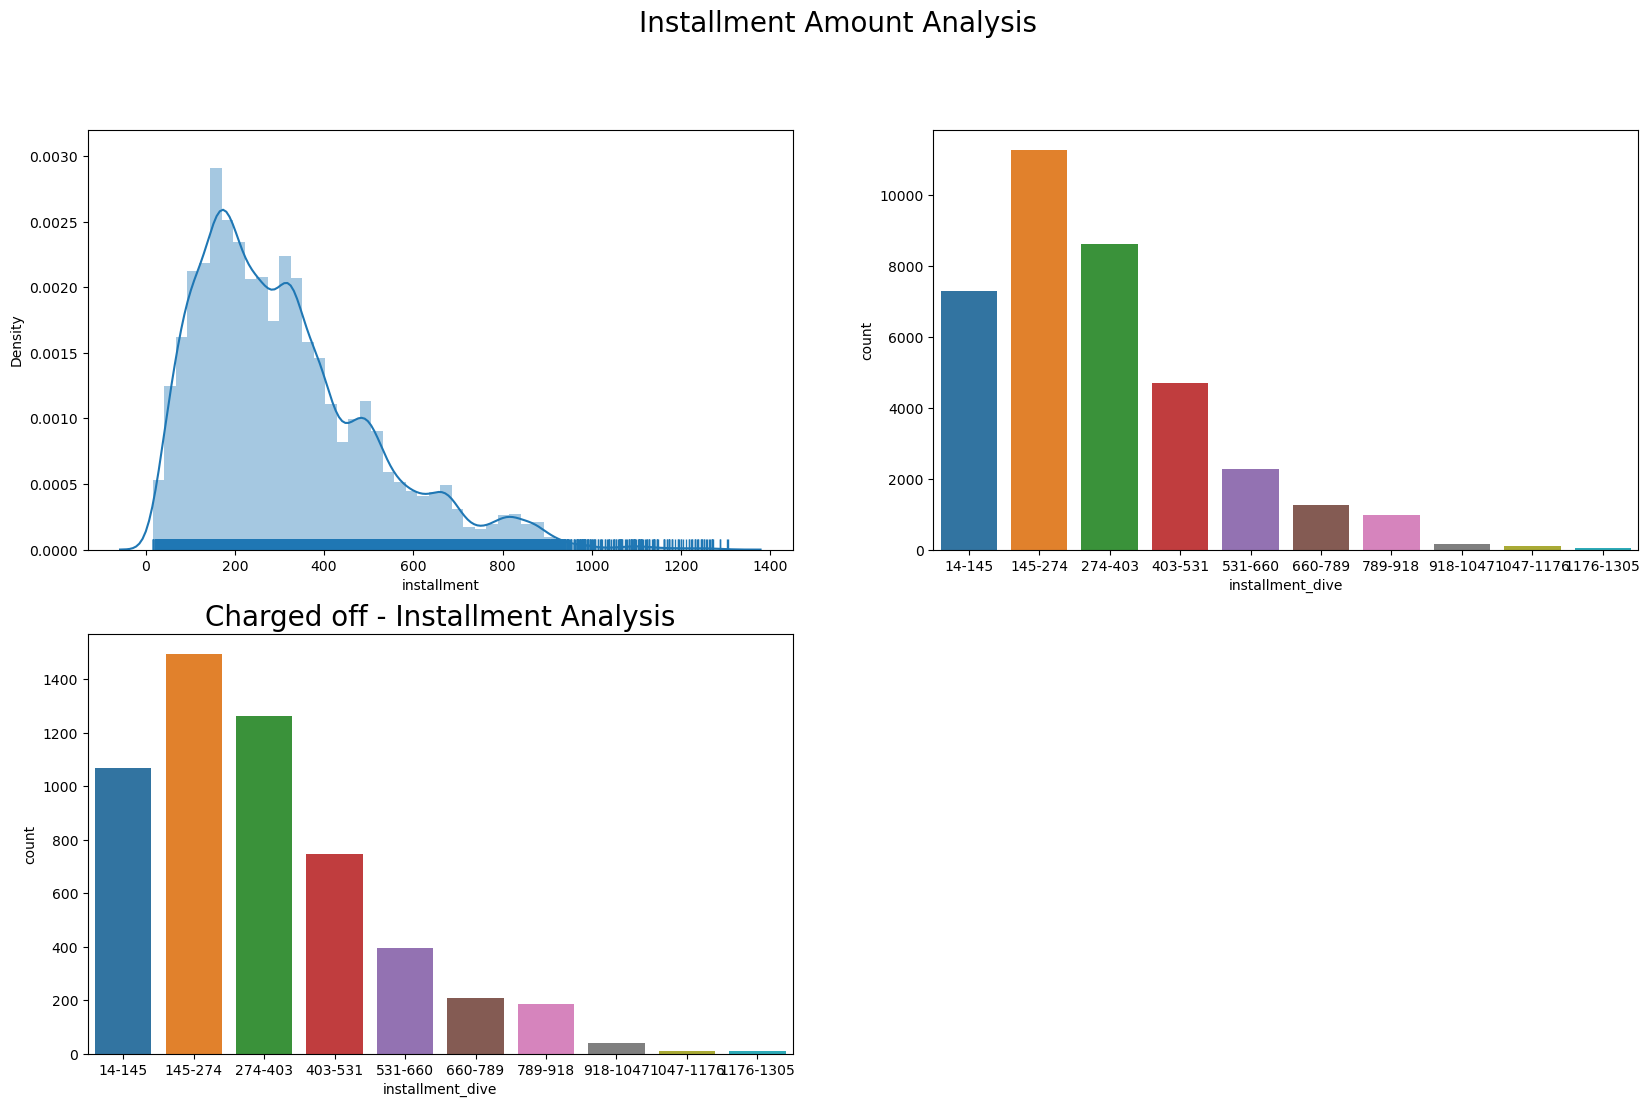

In [274]:
# Check for installment
plt.figure(figsize=(20, 12))
#Setting subplot index
plt.subplot(2,2,1)
sns.distplot(a=ld.installment, rug=True)
plt.subplot(2,2,2)
# OVerall loan data
sns.countplot(x='installment_dive', data=ld)
plt.suptitle('Installment Amount Analysis', size=20)

# Charge Off Loans
plt.subplot(2,2,3)
sns.countplot(x='installment_dive', data=Charged_off_df)
plt.title('Charged off - Installment Analysis', size=20)
plt.show()

Observation 
- Average Installment amount is around 270 - 280
- Charge Off Loans
    - Installment is similar to that for Full Paid Loans

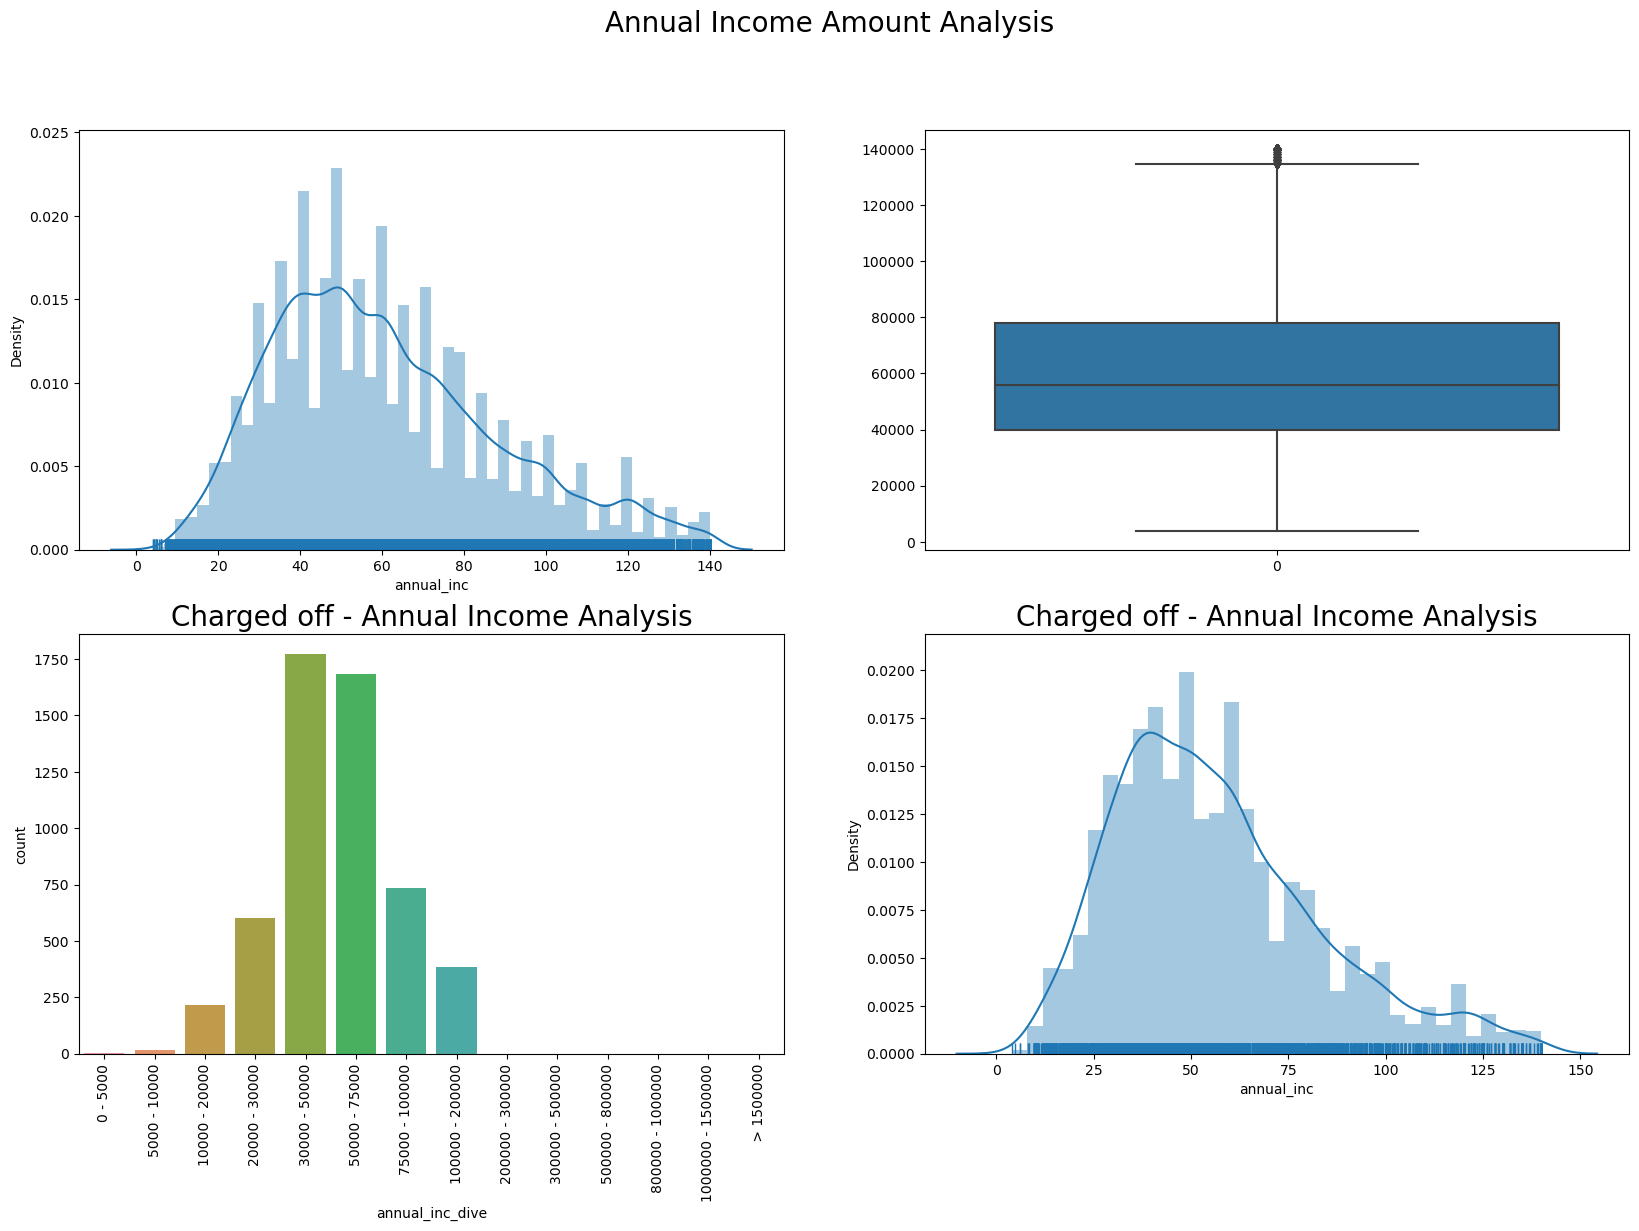

In [285]:
# Check for Annual Income
plt.figure(figsize=(20, 12))
#Setting subplot index
plt.subplot(2,2,1)
sns.distplot(a=ld.annual_inc/1000, rug=True)
plt.subplot(2,2,2)
#Box plot
sns.boxplot(data=ld.annual_inc)
plt.suptitle('Annual Income Amount Analysis', size=20)

# Charge Off Loans
plt.subplot(2,2,3)
sns.countplot(x='annual_inc_dive', data=Charged_off_df)
plt.xticks(rotation=90)
plt.title('Charged off - Annual Income Analysis', size=20)
plt.subplot(2,2,4)
sns.distplot(a=Charged_off_df.annual_inc/1000, rug=True)
plt.title('Charged off - Annual Income Analysis', size=20)
plt.show()

Observation 
- Maximum loans have been availed by the applicants with annual income in range of 40k - 60k
- Charged Off Loans
    - Majority of defaulters have annual income ranging between 50k - 75k.

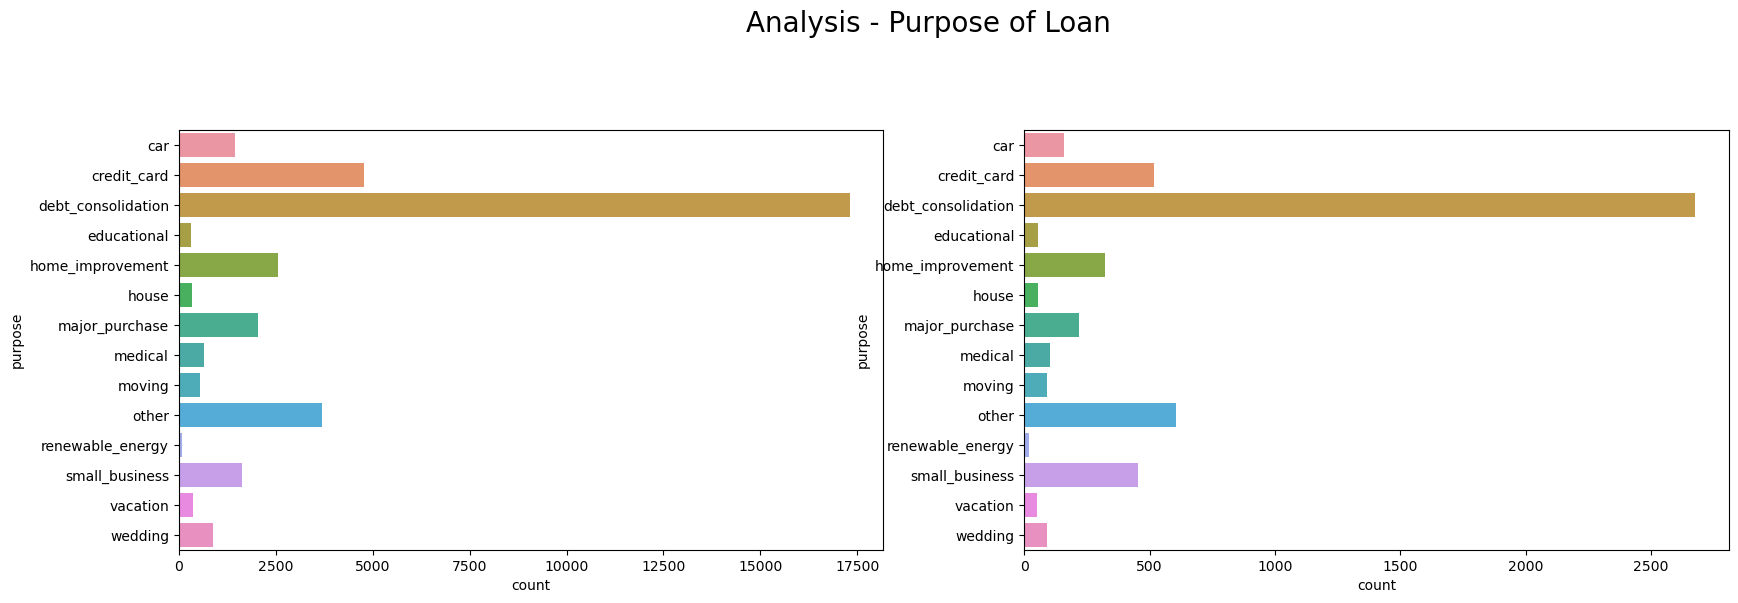

In [282]:
# Purpose of Loan
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.countplot(y=ld.purpose)
#Charged off Loans
plt.subplot(2,2,2)
sns.countplot(y=Charged_off_df.purpose)

plt.suptitle('Analysis - Purpose of Loan', size=20)

plt.show()

In [ ]:
Observation -
- Loans taken for Debt Consolidation purpose are major defaulters, followed for Credit Card & Other purpose.
    - This is similar for Charged Off Loans too.

## Loan Status and Loan Term

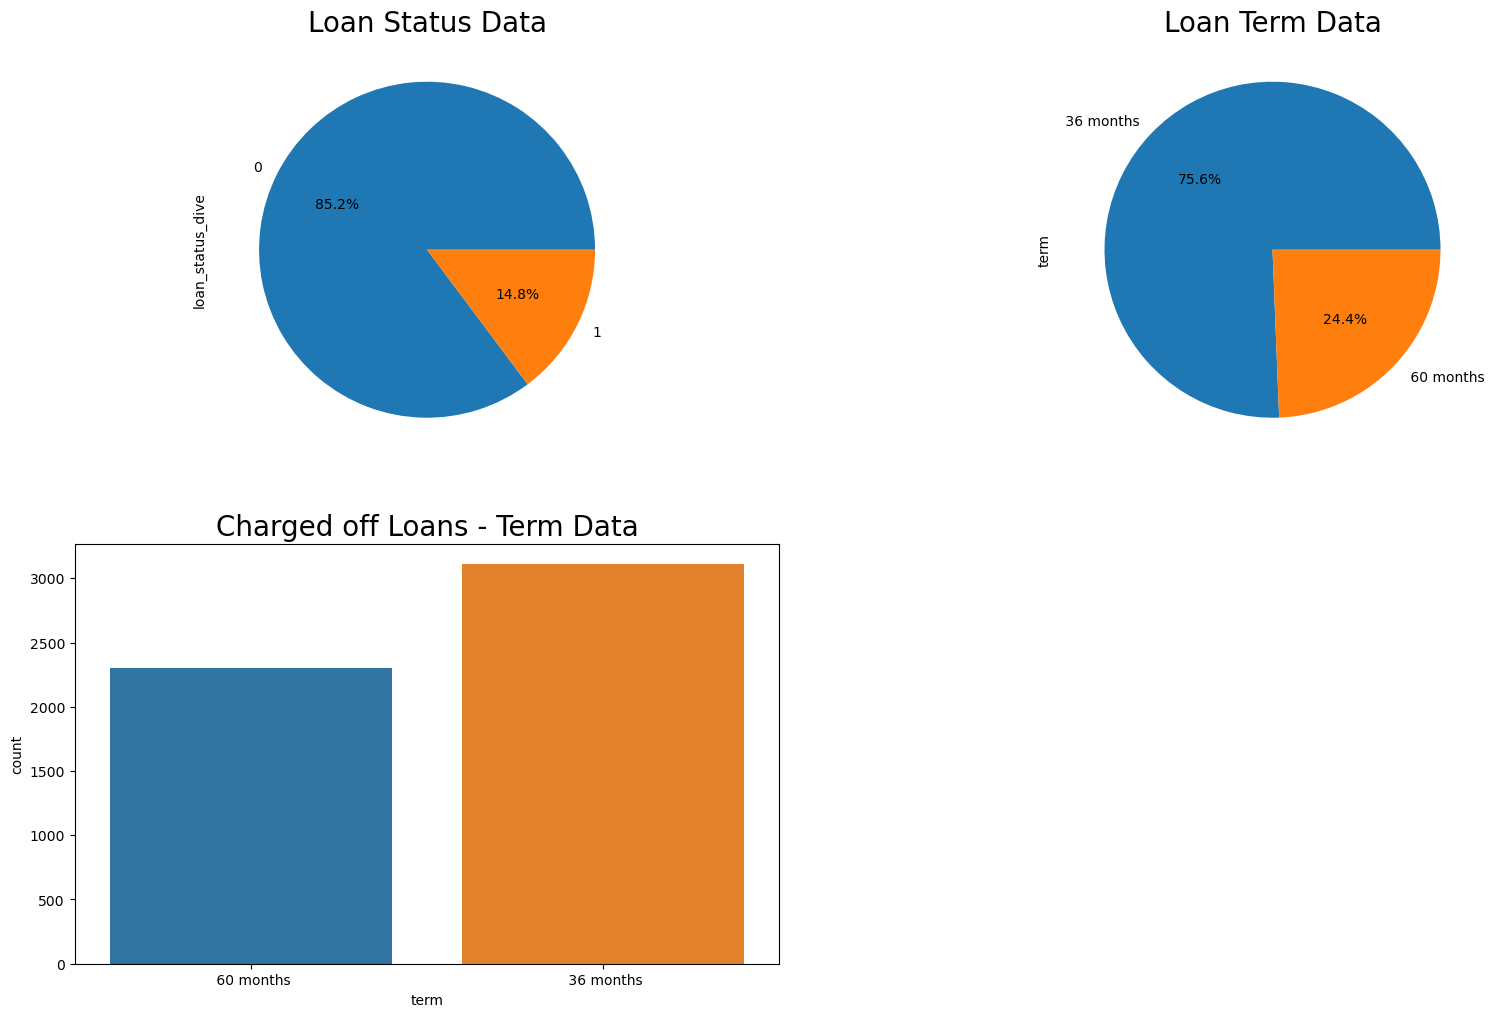

In [89]:
#loan status
#Percentage of loan status
plt.figure(figsize=(20,12))
#Setting subplot index
plt.subplot(2,2,1)
# Pie Plot
ld['loan_status_dive'].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title('Loan Status Data', size=20)
plt.subplot(2,2,2)
#pie plot - Loan Term 
ld['term'].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title('Loan Term Data', size=20)
# Charged-Off Loans vs. Term
plt.subplot(2,2,3)
sns.countplot(x = Charged_off_df['term'], data = Charged_off_df)
plt.title('Charged off Loans - Term Data', size=20)


plt.show()

#### Observation - 
- More than 85% of the loans have been Fully Paid (Settled) 
- More thank 75% of loans have been availed for 36 month term
- Fully Paid rate is higher in 36 months tenure.
- Charged Off Loans
    - Majority of Loan Defaulted (Charged Off) under 36 months Term.
    

#### Loan Applicant Public Records

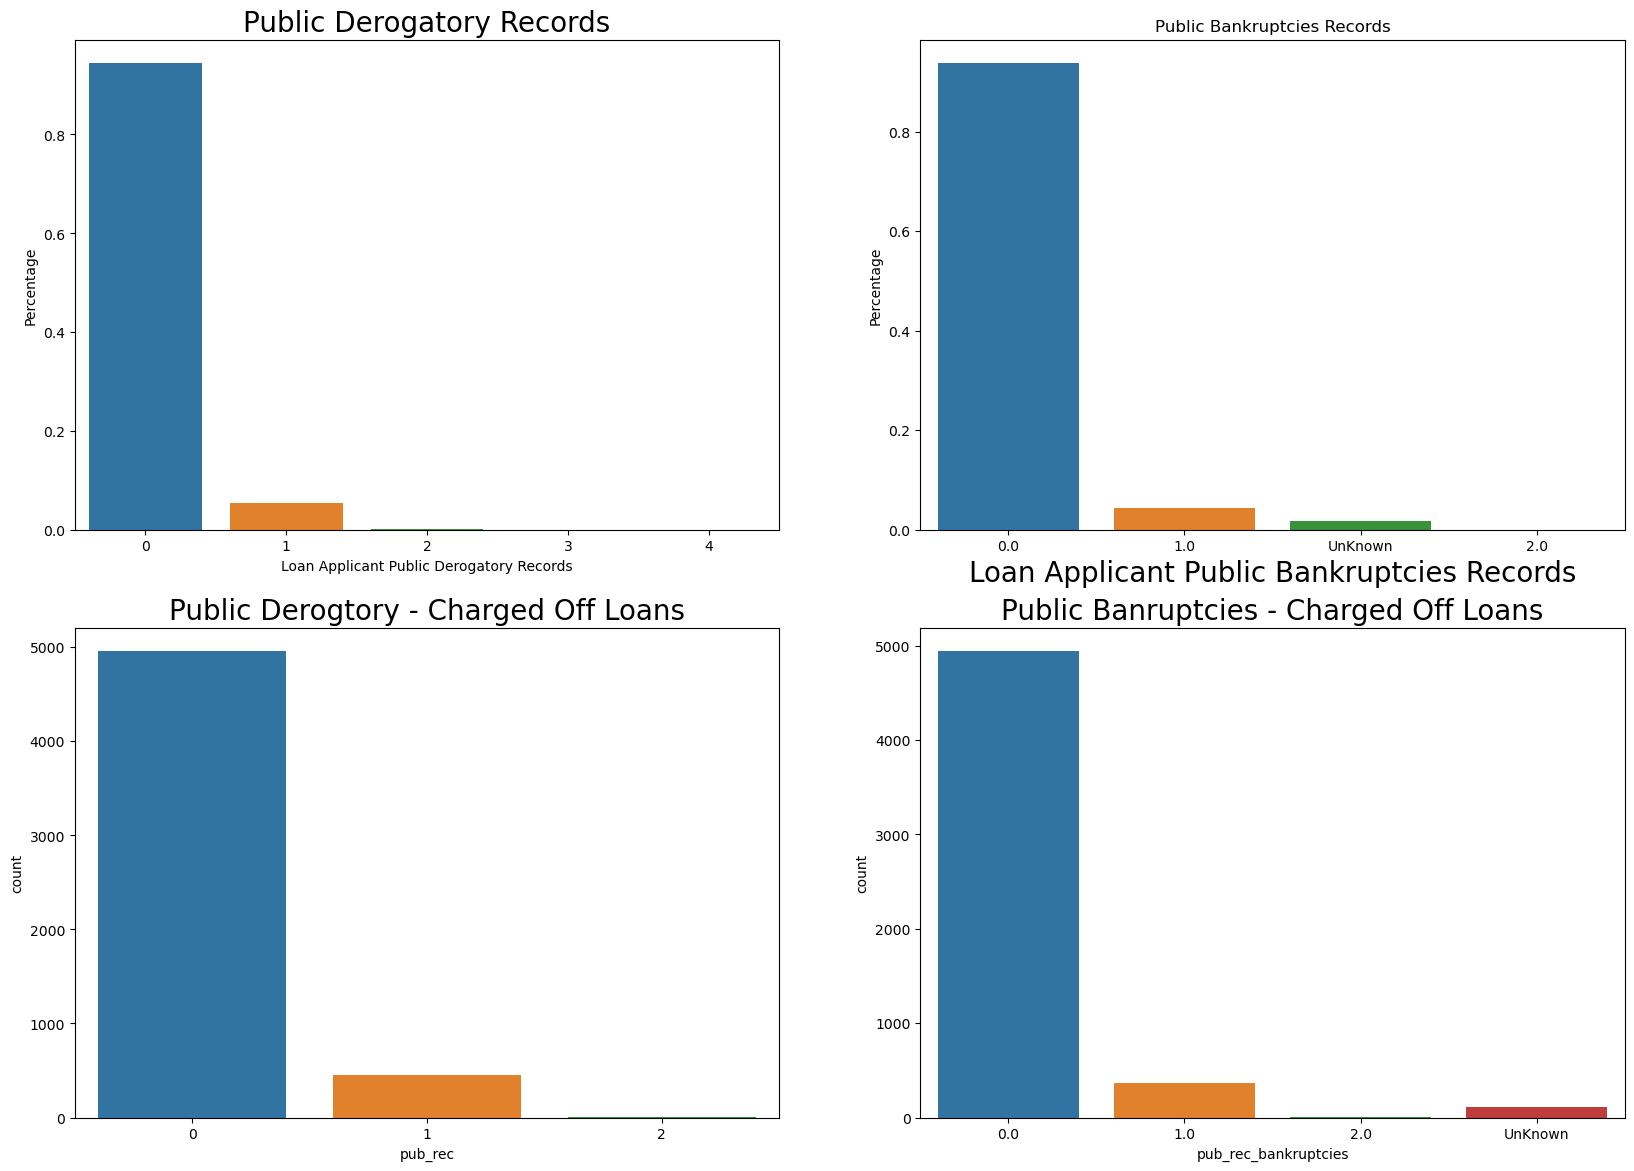

In [91]:
# pub_rec - Public Derogatory Records.
plt.figure(figsize=(20,14))
#Setting subplot index
plt.subplot(2,2,1)
#Percentage of each values
perc_pub_rec = ld['pub_rec'].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='pub_rec', data=perc_pub_rec)
plt.xlabel('Loan Applicant Public Derogatory Records')
plt.ylabel('Percentage')
plt.title('Public Derogatory Records', size=20)
# pub_rec_bankruptcies - Public Bankruptcies Record.
plt.subplot(2,2,2)
#Percentage of each values
perc_bankrupt_rec = ld['pub_rec_bankruptcies'].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='pub_rec_bankruptcies', data=perc_bankrupt_rec)
plt.xlabel('Loan Applicant Public Bankruptcies Records', size=20)
plt.ylabel('Percentage')
plt.title('Public Bankruptcies Records')
# Loans Defaulted for Applicants with Derogatory Records
plt.subplot(2,2,3)
sns.countplot(x = Charged_off_df['pub_rec'], data = Charged_off_df)
plt.title('Public Derogtory - Charged Off Loans', size=20)
# Loans Defaulted for Applicants with Bankruptcy Records
plt.subplot(2,2,4)
sns.countplot(x = Charged_off_df['pub_rec_bankruptcies'], data = Charged_off_df)
plt.title('Public Banruptcies - Charged Off Loans', size=20)

plt.show()

Observation :
- Majority of the loan applicants do not have Public derogatory or Bankruptcy records for Full Paid and Charged Off loans.

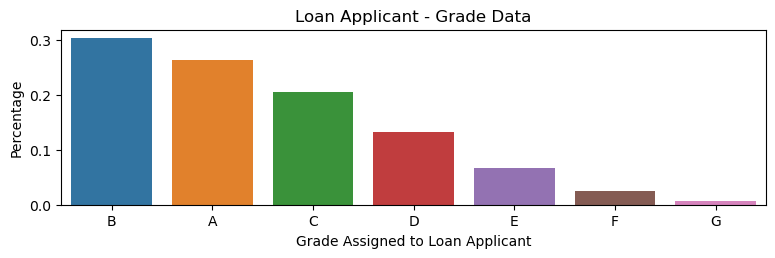

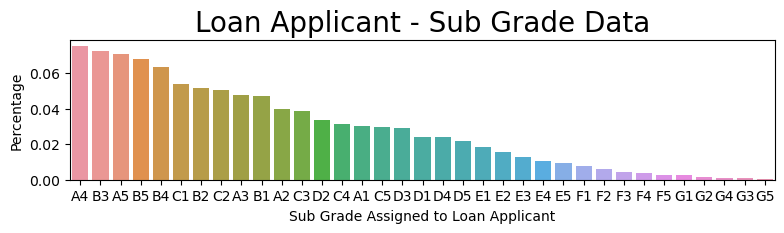

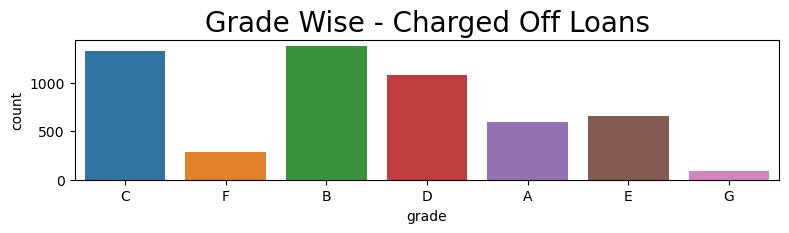

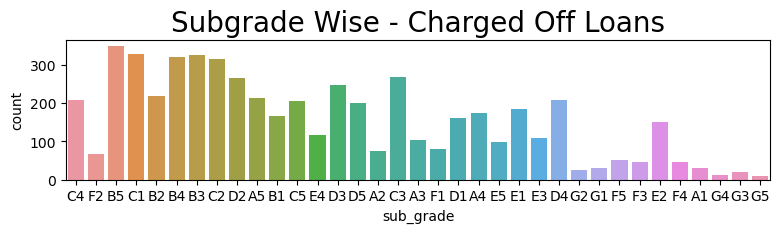

In [92]:
# Grade - Grade assigned to Loan Applicant
plt.figure(figsize=(20,5))
plt.subplot(2,2,1)
#Percentage of each values
perc_grade = ld['grade'].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='grade', data=perc_grade)
plt.xlabel('Grade Assigned to Loan Applicant')
plt.ylabel('Percentage')
plt.title('Loan Applicant - Grade Data')
# sub_grade - Sub Grade Assigned to Loan Applicants
# Adding plot size as the initial plot looked too cluttered on x Axis
plt.figure(figsize=(20,4))
plt.subplot(2,2,2)
#Percentage of each values
perc_sub_grade = ld['sub_grade'].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='sub_grade', data=perc_sub_grade)
plt.xlabel('Sub Grade Assigned to Loan Applicant')
plt.ylabel('Percentage')
plt.title('Loan Applicant - Sub Grade Data', size=20)

### Charged off Loans
plt.figure(figsize=(20,4))
plt.subplot(2,2,3)
sns.countplot(x = Charged_off_df['grade'], data = Charged_off_df)
plt.title('Grade Wise - Charged Off Loans', size=20)
plt.figure(figsize=(20,4))
plt.subplot(2,2,4)
sns.countplot(x = Charged_off_df['sub_grade'], data = Charged_off_df)
plt.title('Subgrade Wise - Charged Off Loans', size=20)
plt.show()

Observation : 
- More than 50% of the loans for Grade A or B loan applicants.
- Sub-Grade Plot re-affirms the observation under Grade.
- Charged off Loans
    - Majority of loans in Grade B and C
    - Sub-Grades under B and C confirm the same

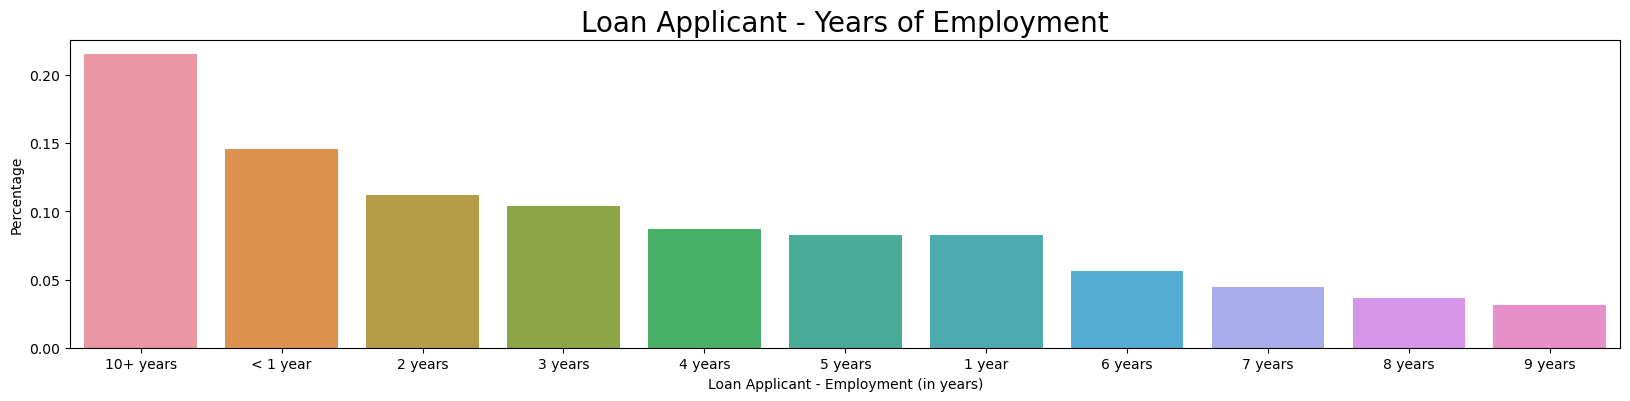

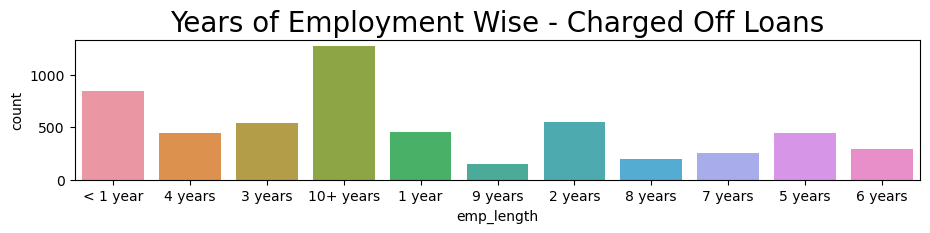

In [93]:
# emp_length
# Adding plot size as the initial plot looked too cluttered on x Axis
plt.figure(figsize=(20,4))
#Percentage of each values
perc_emp_length = ld['emp_length'].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='emp_length', data=perc_emp_length)
plt.xlabel('Loan Applicant - Employment (in years)')
plt.ylabel('Percentage')
plt.title('Loan Applicant - Years of Employment', size=20)

# Charged Off Loans 
plt.figure(figsize=(24,4))
plt.xticks(rotation=90)
plt.subplot(2,2,2)
sns.countplot(x = Charged_off_df['emp_length'], data = Charged_off_df)
plt.title('Years of Employment Wise - Charged Off Loans', size=20)

plt.show()

Observation 
- Majority of loan applicants have greater than 10 years of experience.
- Majority of loan defaulters are with 10+ years of experience.

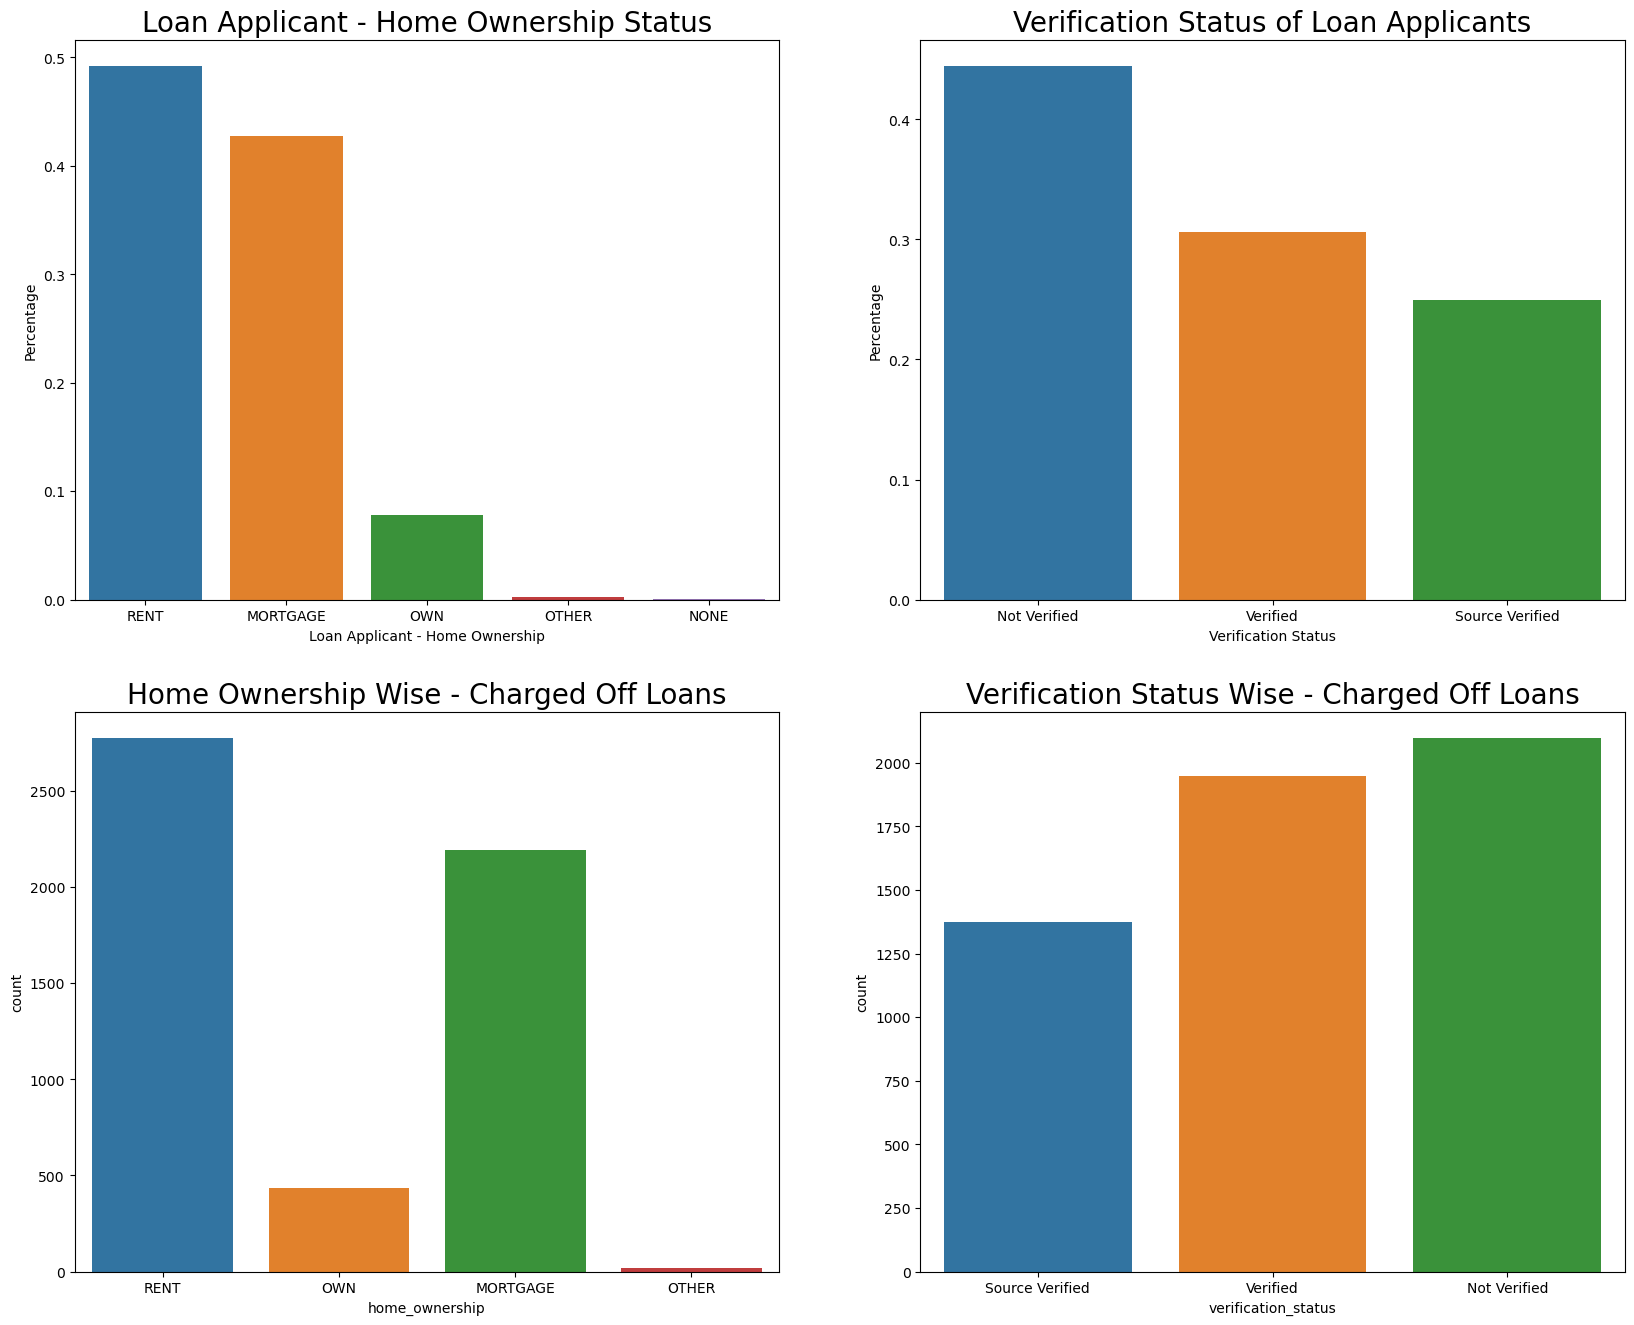

In [94]:
# home_ownership * Verification status
plt.figure(figsize=(20,16))
plt.subplot(2,2,1)
#Percentage of each values
perc_home_ownership = ld['home_ownership'].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='home_ownership', data=perc_home_ownership)
plt.xlabel('Loan Applicant - Home Ownership')
plt.ylabel('Percentage')
plt.title('Loan Applicant - Home Ownership Status', size=20)
#verification_status - Verification of the loan applicant.
plt.subplot(2,2,2)
#Percentage of each values
perc_verification_status = ld['verification_status'].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='verification_status', data=perc_verification_status)
plt.xlabel('Verification Status')
plt.ylabel('Percentage')
plt.title('Verification Status of Loan Applicants',size=20)

# Charged off Loans
plt.subplot(2,2,3)
sns.countplot(x = Charged_off_df['home_ownership'], data = Charged_off_df)
plt.title('Home Ownership Wise - Charged Off Loans', size=20)

plt.subplot(2,2,4)
sns.countplot(x = Charged_off_df['verification_status'], data = Charged_off_df)
plt.title('Verification Status Wise - Charged Off Loans', size=20)

plt.show()

Observation :
- Most of the loan applicants stay in Rental homes or have mortgage against their homes.
- Around 50% of the applicants where sanctioned loan without verification.
- Charged Off Loans
    - Applicants who do not own home (Rental and Mortgage) are the highest defaulters
    - Appicants whose source of income was not verified are likely to default more.

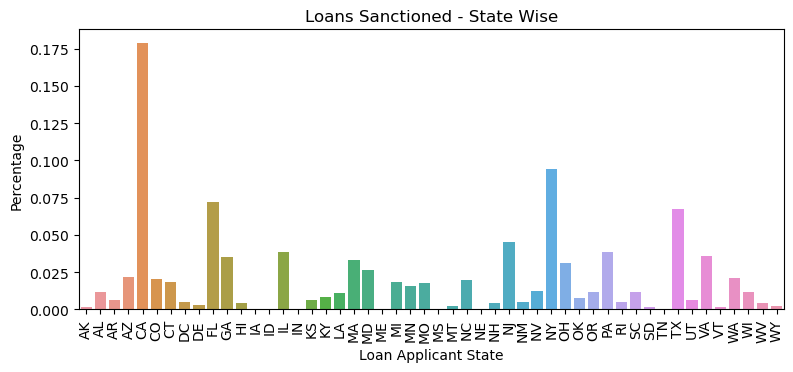

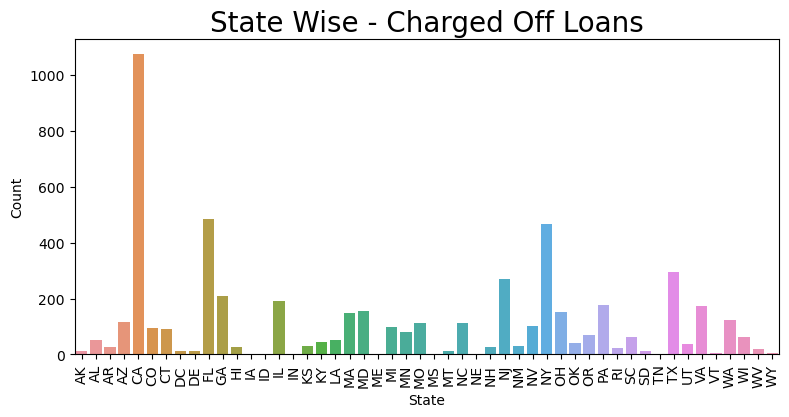

In [286]:
# Loan Applicants from State (address) 
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
# Percentage of each values
perc_addr_state = ld['addr_state'].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y='addr_state', data=perc_addr_state)
plt.xticks(rotation=90)
plt.xlabel('Loan Applicant State')
plt.ylabel('Percentage')
plt.title('Loans Sanctioned - State Wise')

## Charged off Loans
plt.figure(figsize=(20,9))
plt.subplot(2,2,1)
sns.countplot(x=Charged_off_df['addr_state'], data=Charged_off_df)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('State Wise - Charged Off Loans',size=20)
plt.show()

Observation :
- Majority of loans were sanctioned for applicants from California (CA) & New York (NY) states.
- Followed by Florida (FL) and Texas (TX)
- Charged Off Loans
    - Similar stats observed for charged off loans
        - Loans Sanctioned to California residents have majority of the defaulters, followed

#### Analysis on Date Columns

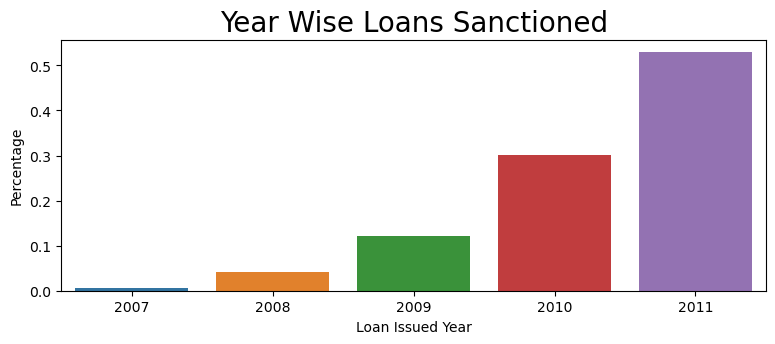

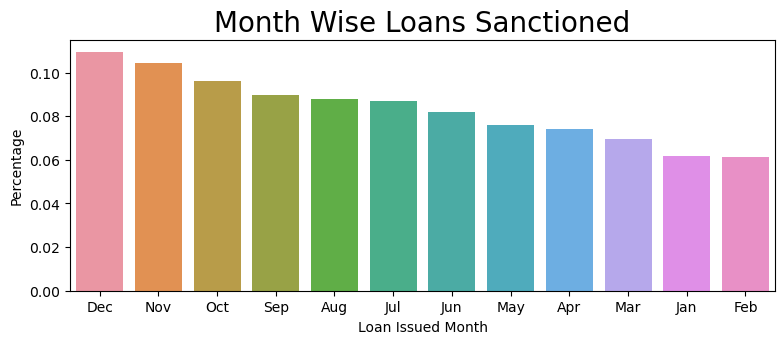

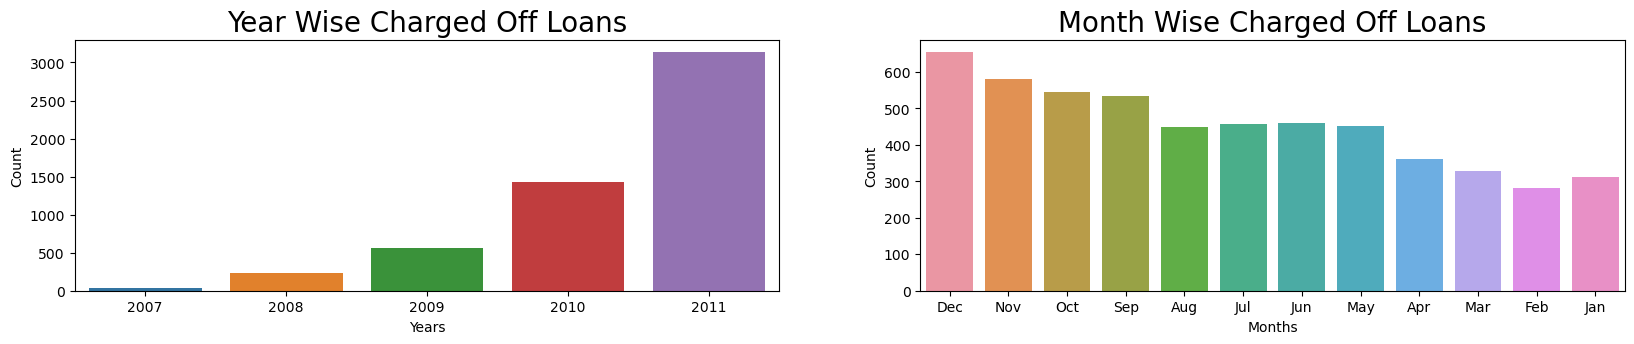

In [96]:
# Loan Issue Date
#Probability / Percentage of each values
perc_issue_d_yr = ld['issue_d_yr'].value_counts(normalize=True).reset_index()

plt.figure(figsize=(20,15))
plt.subplot(4,2,1)
sns.barplot(x='index', y='issue_d_yr', data=perc_issue_d_yr)
plt.xlabel('Loan Issued Year')
plt.ylabel('Percentage')
plt.title('Year Wise Loans Sanctioned',size=20)

#Probability / Percentage of each values
plt.figure(figsize=(20,15))
perc_issue_d_mth = ld['issue_d_mth'].value_counts(normalize=True).reset_index()
plt.subplot(4,2,2)
sns.barplot(x='index', y='issue_d_mth', data=perc_issue_d_mth)
plt.xlabel('Loan Issued Month')
plt.ylabel('Percentage')
plt.title('Month Wise Loans Sanctioned',size=20)

## Charged Off Loans
plt.figure(figsize=(20,15))
plt.subplot(4,2,3)
sns.countplot(x=Charged_off_df['issue_d_yr'], data=Charged_off_df[Charged_off_df['loan_status'] =='Charged Off'])
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Year Wise Charged Off Loans',size=20)
plt.subplot(4,2,4)
sns.countplot(x=Charged_off_df['issue_d_mth'], data=Charged_off_df[Charged_off_df['loan_status'] =='Charged Off'])
plt.xlabel('Months')
plt.ylabel('Count')
plt.title('Month Wise Charged Off Loans',size=20)
plt.show()

Observation:
- More than 50% of the loans were sanctioned in 2011 year
- YoY increase in number of loans sanctioned is increasing approx. 2x times.  
- Maximum number of loans were sanctioned during las few months of the year (Oct to Dec), while Months of Jul, Aug and Sep shows consistent number of loans sanctioned.
- Charged Off 
    - Loans are maximum for the year 2011 & for months Oct to Dec
    - Trend is similar as in case overall sanctioned loans.

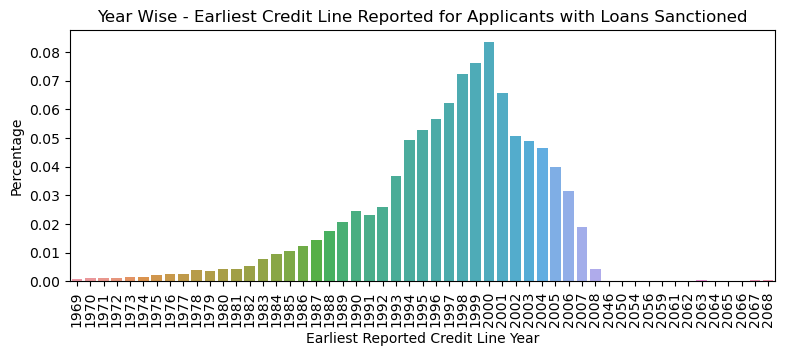

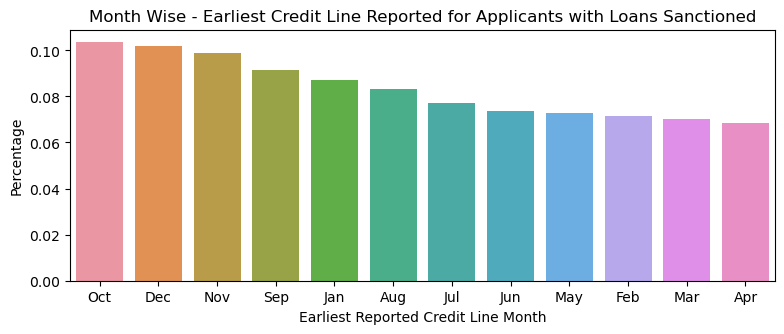

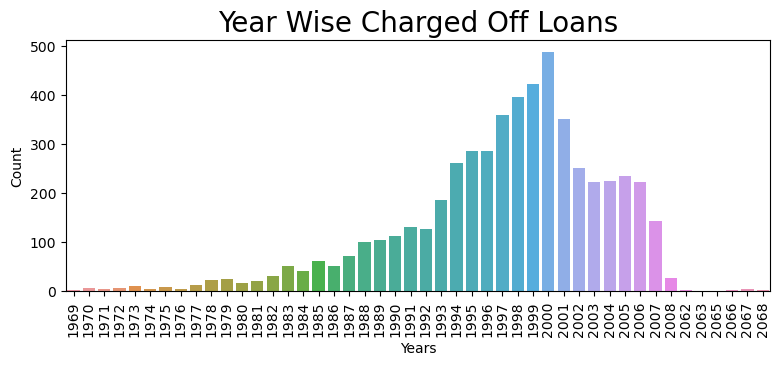

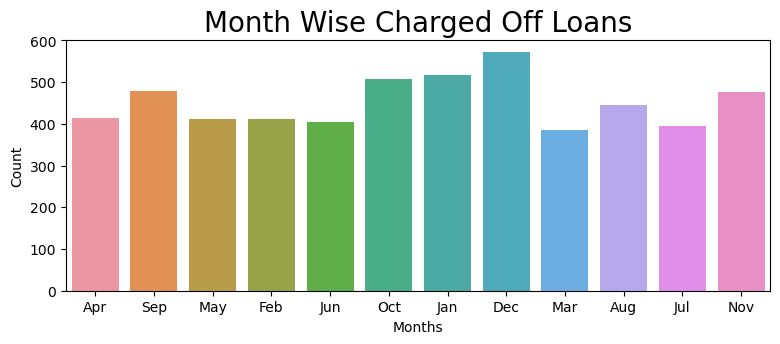

In [97]:
# Earliest Credit Line (earliest_cr_line) - The month the borrower's earliest reported credit line was opened
#Percentage of each values
perc_earliest_cr_line_yr = ld['earliest_cr_line_yr'].value_counts(normalize=True).reset_index()

plt.figure(figsize=(20,15))
plt.subplot(4,2,1)
sns.barplot(x='index', y='earliest_cr_line_yr', data=perc_earliest_cr_line_yr)
plt.xticks(rotation=90)
plt.xlabel('Earliest Reported Credit Line Year')
plt.ylabel('Percentage')
plt.title('Year Wise - Earliest Credit Line Reported for Applicants with Loans Sanctioned')

#Percentage of each values
plt.figure(figsize=(20,15))
perc_earliest_cr_line_mth = ld['earliest_cr_line_mth'].value_counts(normalize=True).reset_index()
plt.subplot(4,2,2)
sns.barplot(x='index', y='earliest_cr_line_mth', data=perc_earliest_cr_line_mth)
plt.xlabel('Earliest Reported Credit Line Month')
plt.ylabel('Percentage')
plt.title('Month Wise - Earliest Credit Line Reported for Applicants with Loans Sanctioned')

## Charged Off Loans
plt.figure(figsize=(20,15))
plt.subplot(4,2,3)
sns.countplot(x=Charged_off_df['earliest_cr_line_yr'], data=Charged_off_df)
plt.xticks(rotation=90)
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Year Wise Charged Off Loans',size=20)
plt.figure(figsize=(20,15))
plt.subplot(4,2,4)
sns.countplot(x=Charged_off_df['earliest_cr_line_mth'], data=Charged_off_df)
plt.xlabel('Months')
plt.ylabel('Count')
plt.title('Month Wise Charged Off Loans',size=20)

plt.show()

Observation -
- Maximum number of loan applicant got their earliest credit line during the year of 2000.
- Month Wise Data shows similar consistency as Loan Issue Month, most of the Loan applicants got their Earliest Credit Line from Oct to Nov.
- Charged Off Loans 
    - Yearly & Month Trend for Charged Off Loans trend is similar to the overall loans Sanctioned.

## Segmented Univariate Analysis

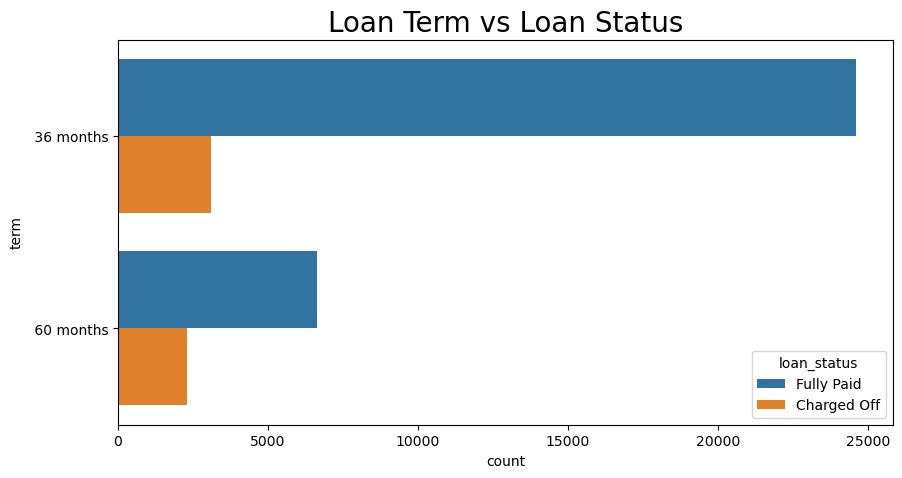

In [319]:
# Loan Term vs. Loan Status
plt.figure(figsize=(10,5))
sns.countplot(data=ld, y='term', hue='loan_status', hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Loan Term vs Loan Status', size=20)
plt.show()

Observaton :
- 60 month terms has higher number of defaulters
- Loan applicants with 60 month term are more likely to default.

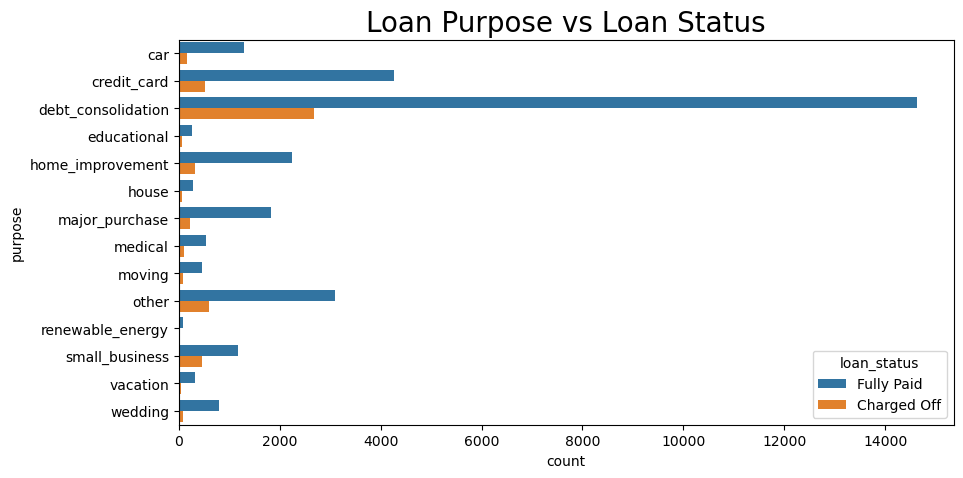

In [320]:
# purpose vs. Loan Status
plt.figure(figsize=(10,5))
sns.countplot(data=ld, y='purpose', hue='loan_status', hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Loan Purpose vs Loan Status', size=20)
plt.show()

Observation
- Debt Consolidation has highest number of fully paid and charged off loans.

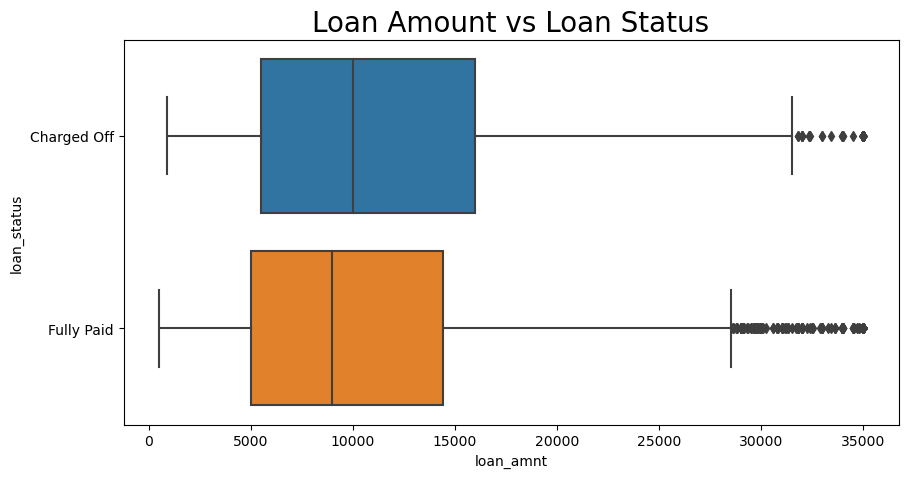

In [297]:
# Loan Amount vs. Loan Status
plt.figure(figsize=(10,5))
sns.boxplot(data=ld,x='loan_amnt',y='loan_status')
plt.title('Loan Amount vs Loan Status', size=20)
plt.show()

Observation
- 0.25 percentile is almost same for both Full Paid and Charged Loans, but the gap is higher at 0.75 percentile
- This indicates that higher loan amount is more likely to be defaulted.

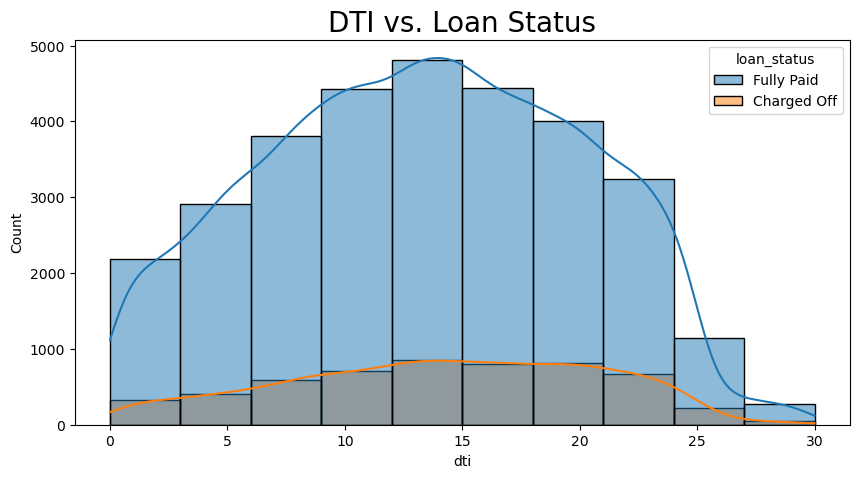

In [303]:
# DTI vs. Loan Status
plt.figure(figsize=(10,5))
sns.histplot(data=ld,x='dti',hue='loan_status',bins=10, kde=True, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('DTI vs. Loan Status',size=20)
plt.show()

Observation
- Loan applicants with DTI in range of 10 - 15 are more likely to default loan.

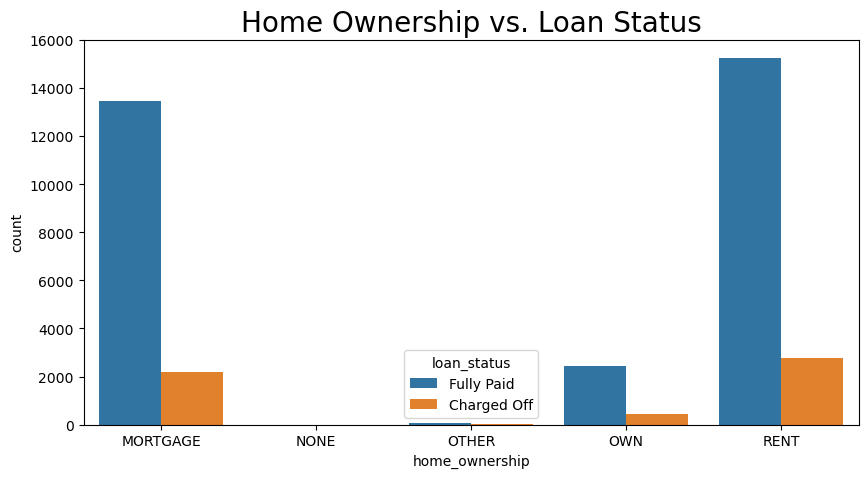

In [301]:
# Home Ownership vs. Loan Status
plt.figure(figsize=(10,5))
sns.countplot(data=ld,x='home_ownership',hue='loan_status',hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Home Ownership vs. Loan Status',size=20)
plt.show()

Observation
- Loan Applicants who do not own home (Mortgage & Rent) are high probability of defaulting loans

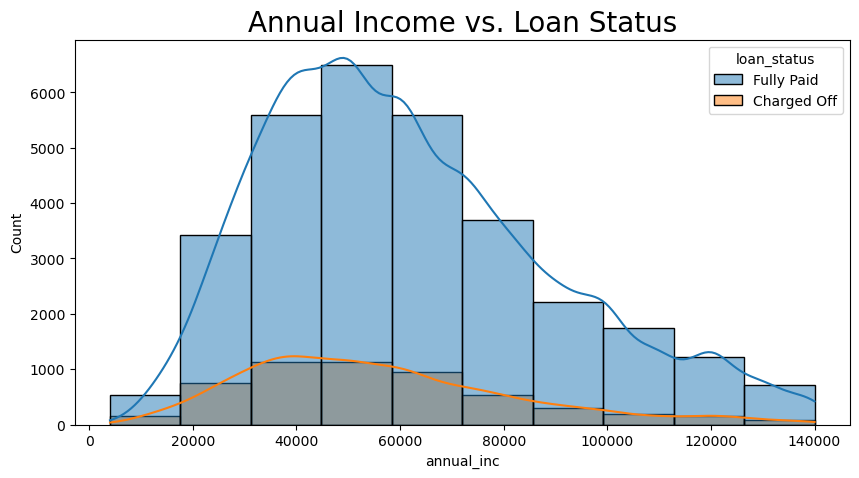

In [304]:
# Annual Income vs. Loan Status
plt.figure(figsize=(10,5))
sns.histplot(data=ld,x='annual_inc',hue='loan_status',bins=10, kde=True, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Annual Income vs. Loan Status',size=20)
plt.show()

Observation
- Loan Applicant with Annual Income below <60k are most likely to default.

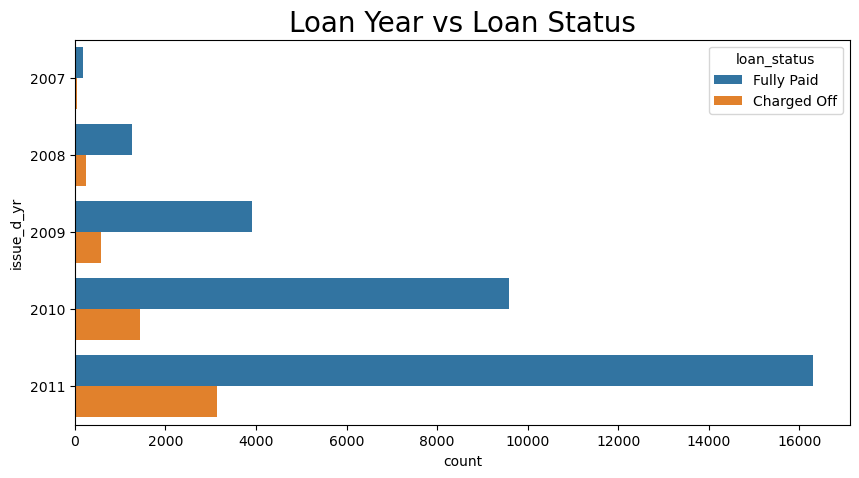

In [305]:
# Loan Sanction Year vs. Loan Status
plt.figure(figsize=(10,5))
sns.countplot(data=ld, y='issue_d_yr', hue='loan_status', hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Loan Year vs Loan Status', size=20)
plt.show()

Observation
- Both Fully Paid and Charged Off Loans are increase exponentially YoY

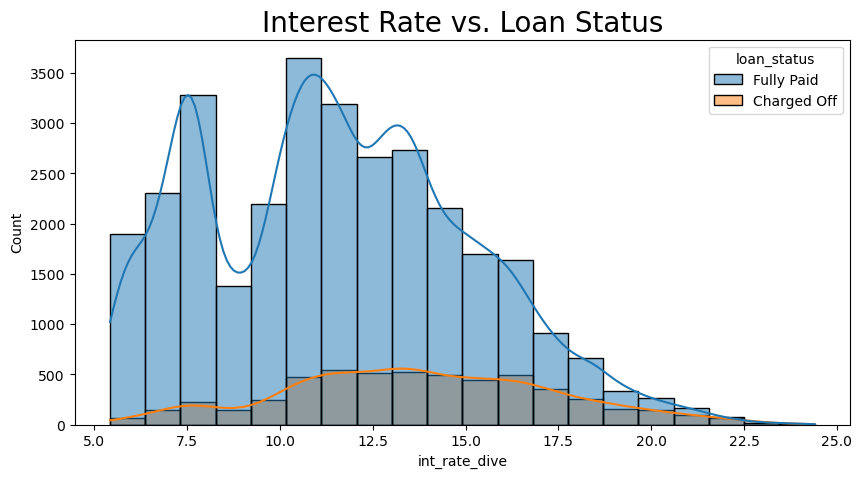

In [317]:
# int_rate vs. loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=ld,x='int_rate_dive',hue='loan_status', bins=20, kde=True, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Interest Rate vs. Loan Status',fontsize=20)
plt.show()

Observation
- Charged Off Loans increase with interest rates and gradually declines.

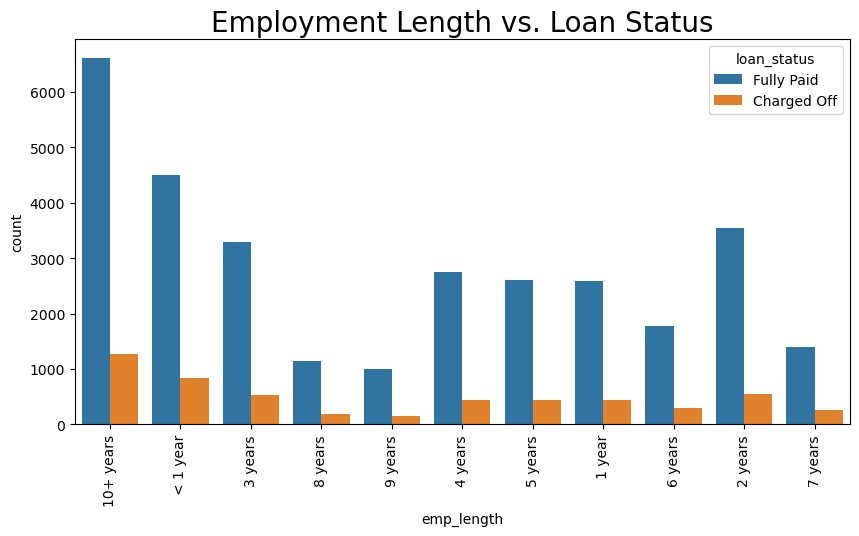

In [322]:
# Employment Length vs. Loan Status
plt.figure(figsize=(10,5))
sns.countplot(data=ld,x='emp_length',hue='loan_status',hue_order = ['Fully Paid', 'Charged Off'])
plt.xticks(rotation=90)
plt.title('Employment Length vs. Loan Status',size=20)
plt.show()

Observation
- Loan Applicants with 10+ years of experience are most likely to default loans.

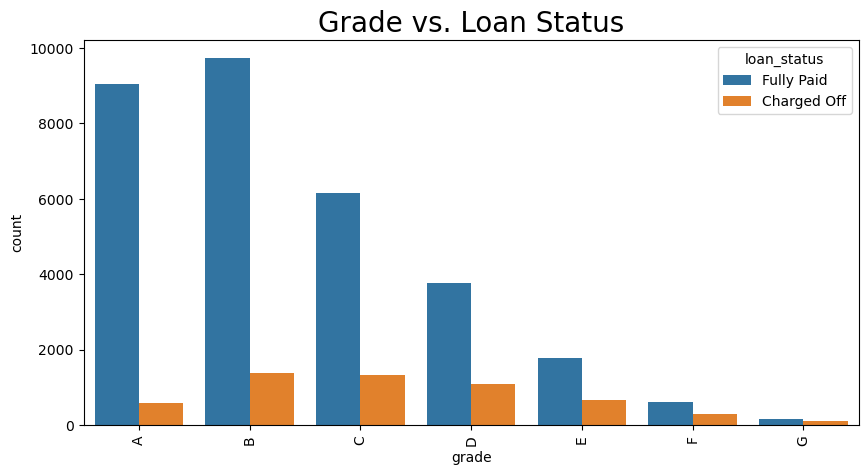

In [407]:
# Grade vs. Loan Status
plt.figure(figsize=(10,5))
sns.countplot(data=ld,x='grade',hue='loan_status',hue_order = ['Fully Paid', 'Charged Off'])
plt.xticks(rotation=90)
plt.title('Grade vs. Loan Status',size=20)
plt.show()

In [ ]:
Observation
- Grade A and B have highest number of Fully Paid Loans
- Grade B and C have higher count of Charged Off Loans

## Bivariate Analysis

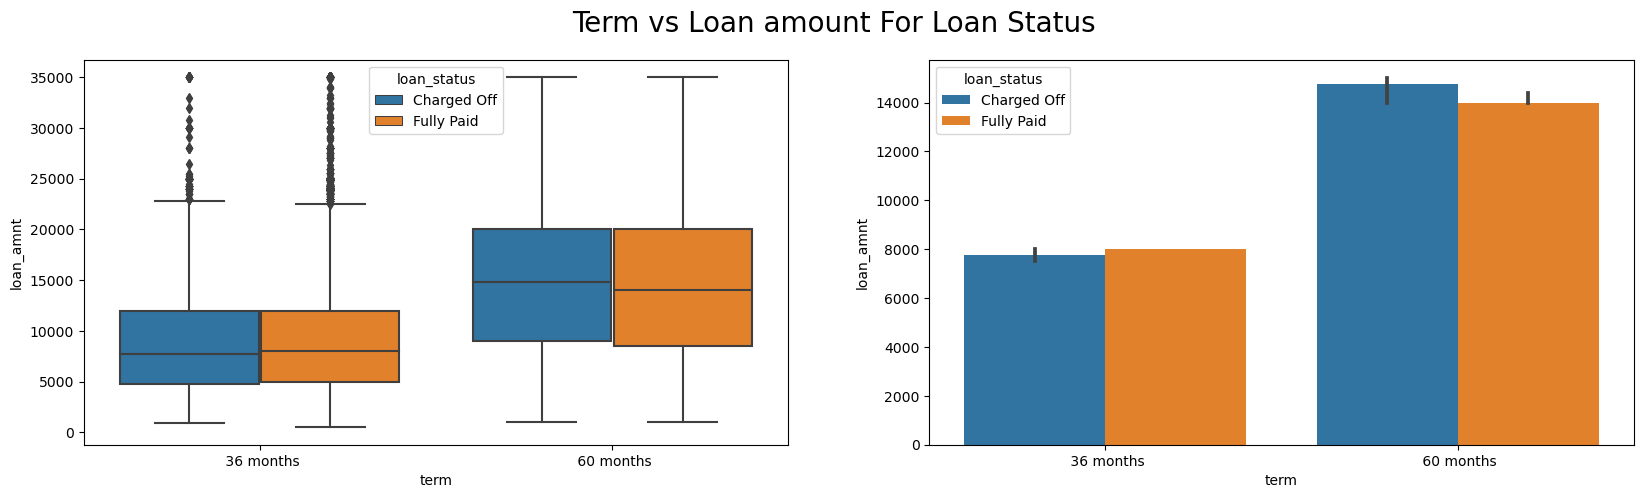

In [323]:
# Loan Amount and Loan Term vs, Loan Status
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=ld)
plt.subplot(1,2,2)
sns.barplot(x='term', y='loan_amnt', hue='loan_status', data=ld, estimator=np.median)
plt.suptitle('Term vs Loan amount For Loan Status', size=20)
plt.show()

Observation :
- More Loans are sanctioned for 60 months term
- Higher amount of loan is sanctioned for 60 months term.
- Loan Defaulters are higher in case of 60 months term. 
  

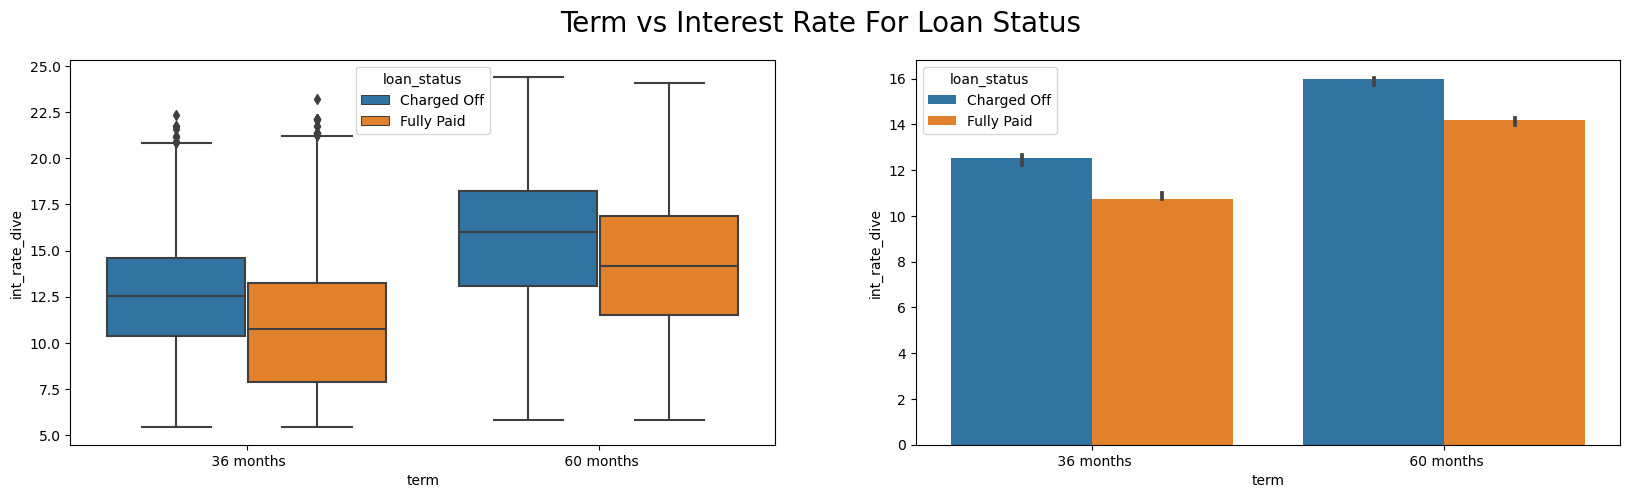

In [324]:
# Term vs. Interest Rate vs. Loan status
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x='term', y='int_rate_dive', hue='loan_status', data=ld)
plt.subplot(1,2,2)
sns.barplot(x='term', y='int_rate_dive', hue='loan_status', data=ld, estimator=np.median)
plt.suptitle('Term vs Interest Rate For Loan Status', size=20)
plt.show()

Observation
- Interest Rate for Charged Off Loans is higher than the Fully Paid loans for both 36 months and 60 months term.

<Figure size 1000x500 with 0 Axes>

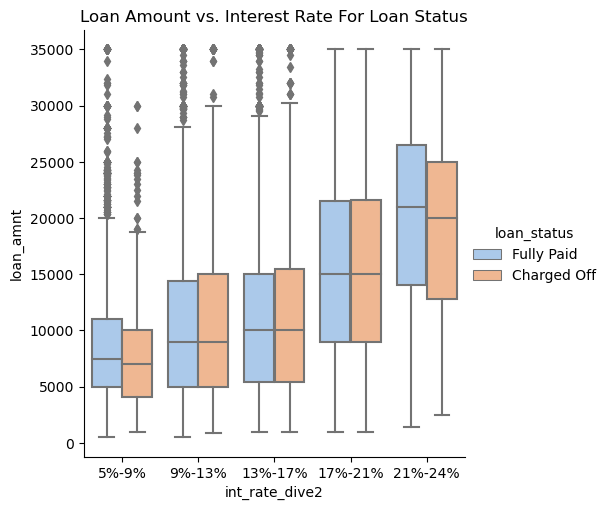

In [408]:
# Lets Check Loan Amount vs Interest Rate vs. Loan Status
plt.figure(figsize=(10,5))
sns.catplot(data =ld, y ='loan_amnt', x ='int_rate_dive2', hue ='loan_status', hue_order = ['Fully Paid', 'Charged Off'], palette="pastel",kind = 'box')
plt.title('Loan Amount vs. Interest Rate For Loan Status')
plt.show()

Observation - 
- Charged Off Loans are higher for interest rate range between 9% - 17%.
- Fully Paid Loans are same or higher for higher interest rates.

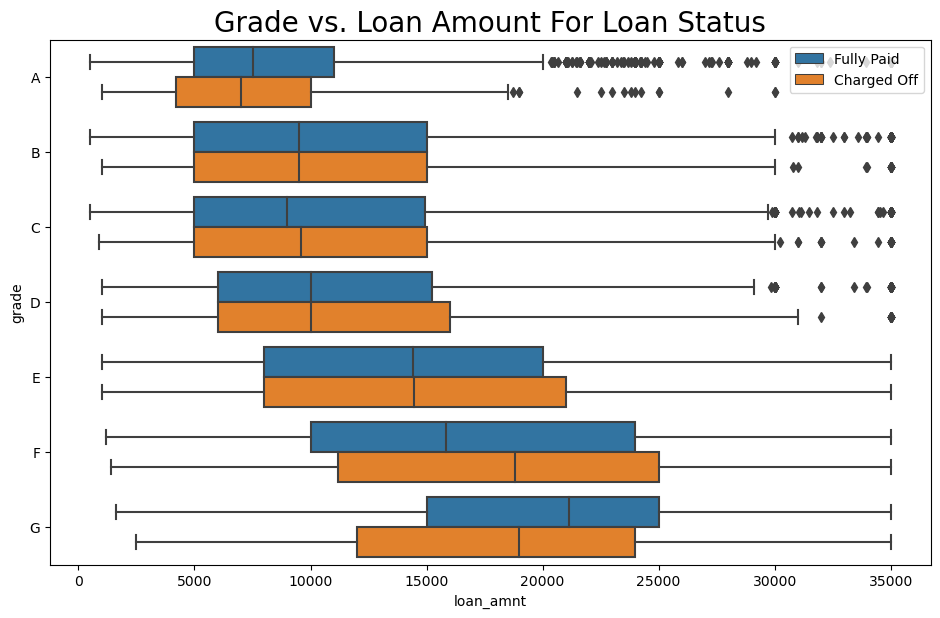

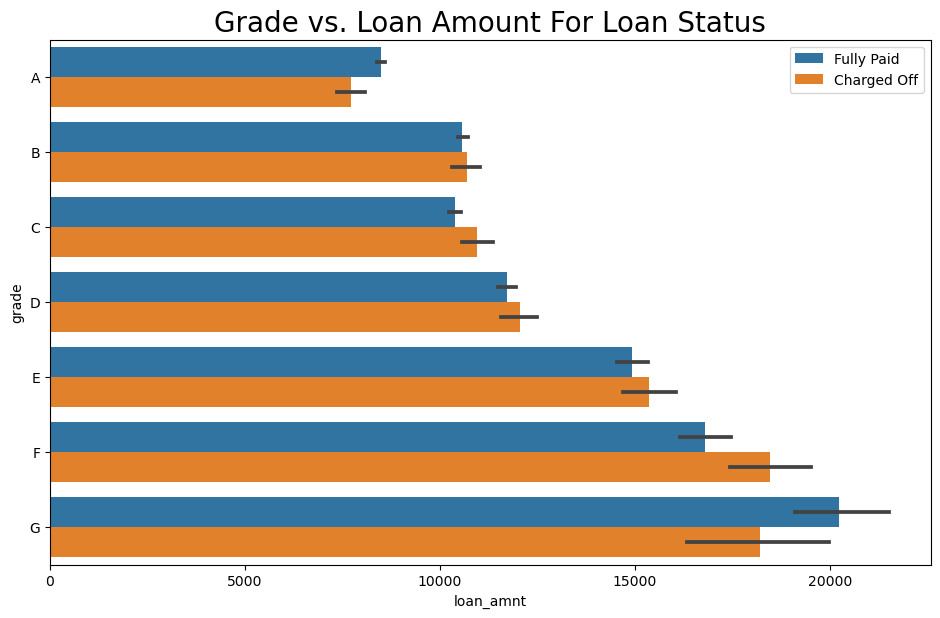

In [342]:
# Loan Amount, Grade and Status
# Grade vs. Loan Amount vs. Loan status
plt.figure(figsize=(25,15))
plt.subplot(2,2,1)
sns.boxplot(x='loan_amnt', y='grade', hue='loan_status', data=ld, order=['A','B','C','D','E','F','G'],hue_order = ['Fully Paid', 'Charged Off'])
plt.legend(loc='upper right')
plt.title('Grade vs. Loan Amount For Loan Status', size=20)
plt.figure(figsize=(25,15))
plt.subplot(2,2,2)
sns.barplot(data =ld,x='loan_amnt', y='grade', hue ='loan_status', order=['A','B','C','D','E','F','G'],hue_order = ['Fully Paid', 'Charged Off'])
plt.legend(loc='upper right')
plt.title('Grade vs. Loan Amount For Loan Status', size=20)
plt.show()

Observation :
- Charged Off loans are lower for Grade A, the charged off loans are lower for Grade G but the number of loans for this grade is substantially low when compared to other grades.
- Charged Off Loans steadily rise in numbers as the grade move from B (Higher) to F (Lower)

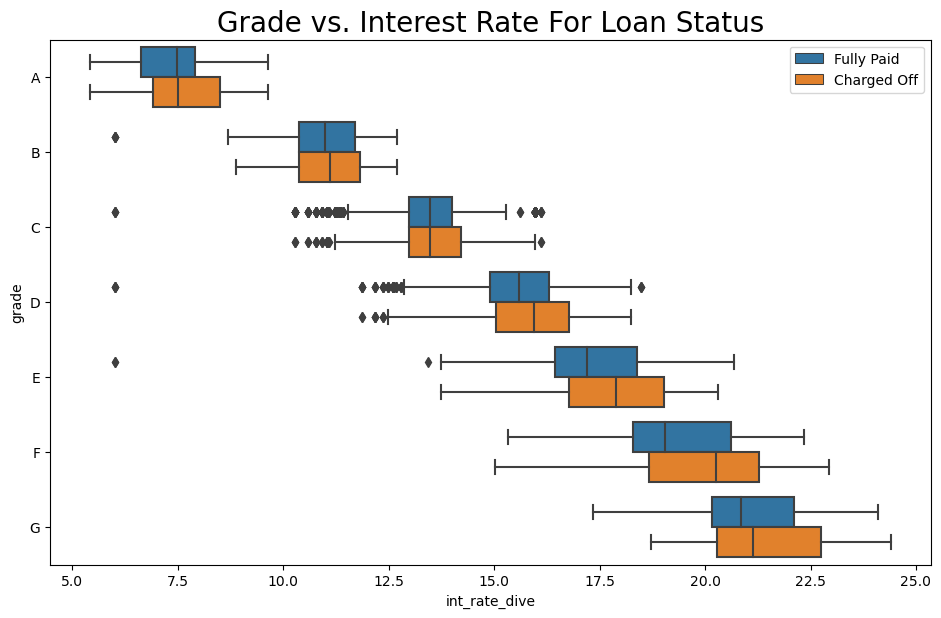

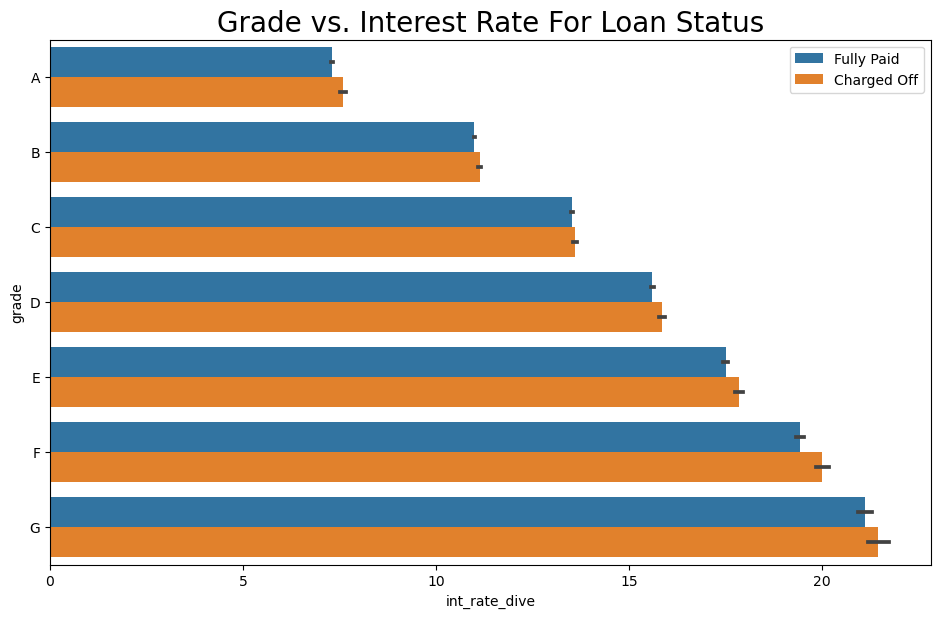

In [345]:
# Grade vs. Interest Rate vs. Loan status
plt.figure(figsize=(25,15))
plt.subplot(2,2,1)
sns.boxplot(x='int_rate_dive', y='grade', hue='loan_status', data=ld, order=['A','B','C','D','E','F','G'],hue_order = ['Fully Paid', 'Charged Off'])
plt.legend(loc='upper right')
plt.title('Grade vs. Interest Rate For Loan Status', size=20)
plt.figure(figsize=(25,15))
plt.subplot(2,2,2)
sns.barplot(data =ld,x='int_rate_dive', y='grade', hue ='loan_status', order=['A','B','C','D','E','F','G'],hue_order = ['Fully Paid', 'Charged Off'])
plt.legend(loc='upper right')
plt.title('Grade vs. Interest Rate For Loan Status', size=20)
plt.show()

Observation :
- The Defaulted (Charged Off) loans steadily increase (in terms of percentage) as we move from Grade B (Higher) to G (Lower).
- Indicating that lower Graded Applicants with high interest rates carry larger risk of loan default.

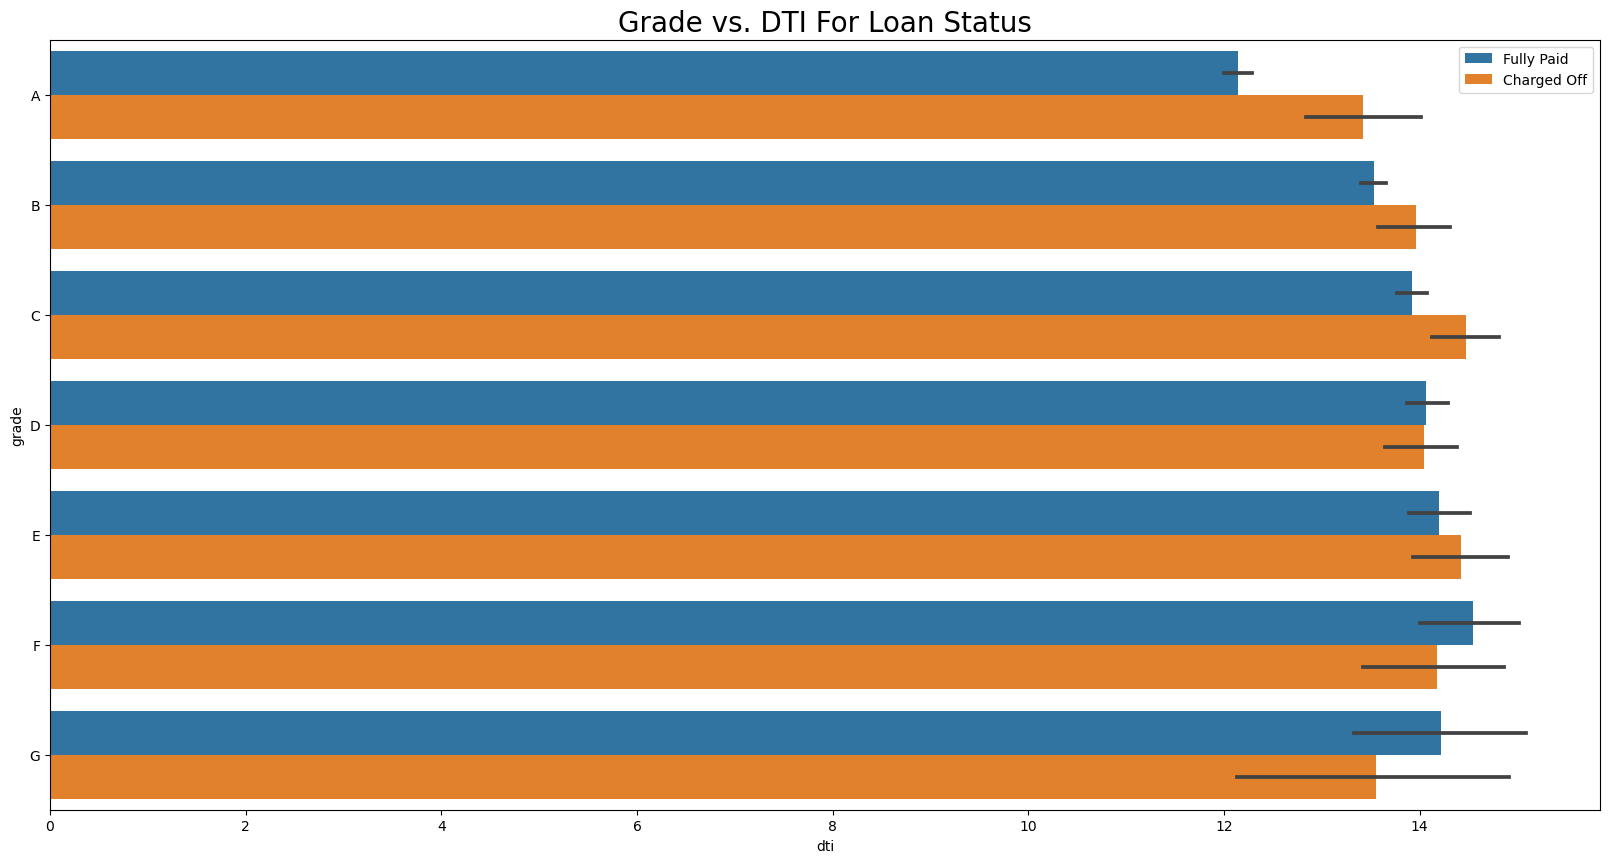

In [349]:
# Grade vs.DTI vs. Loan status
plt.figure(figsize=(20,10))
sns.barplot(data =ld,x='dti', y='grade', hue ='loan_status', order=['A','B','C','D','E','F','G'],hue_order = ['Fully Paid', 'Charged Off'])
plt.legend(loc='upper right')
plt.title('Grade vs. DTI For Loan Status', size=20)
plt.show()

Observation
- Grade A has lowest default risk, we can infer tha Higher Grades have low risk of defaulting loans.

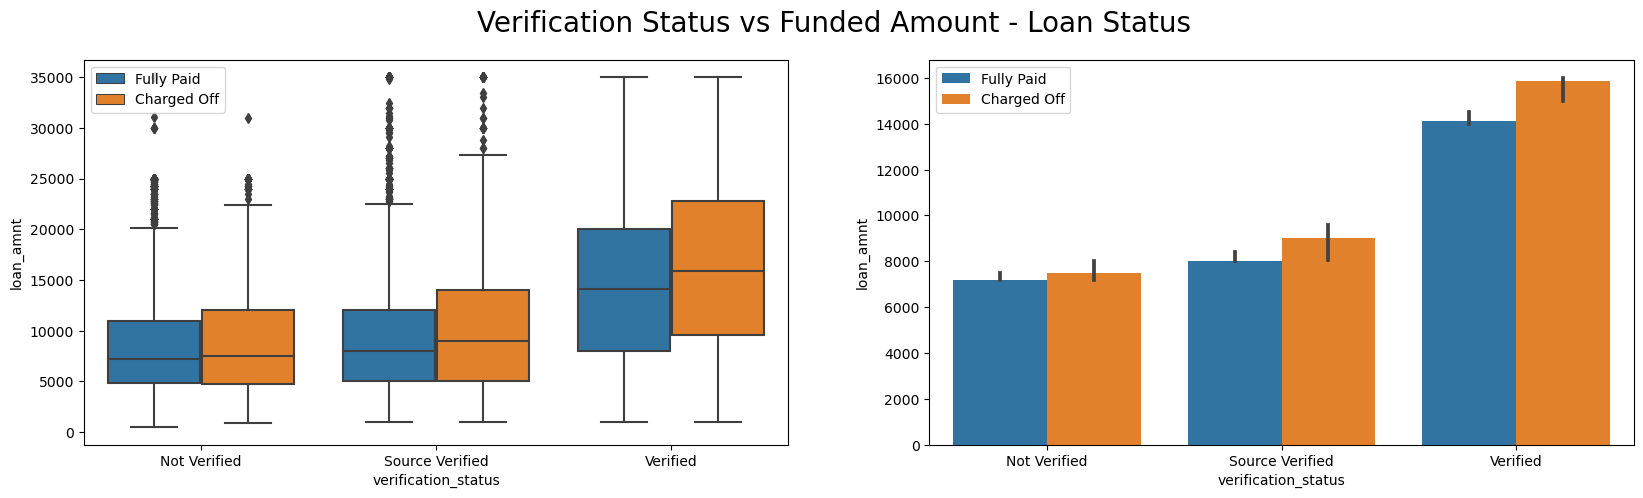

In [355]:
# Loan Amount vs. Verification Status vs. Loan Status
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x='verification_status', y='loan_amnt', hue='loan_status', data=ld, hue_order = ['Fully Paid', 'Charged Off'])
plt.legend(loc='upper left')
plt.subplot(1,2,2)
sns.barplot(x='verification_status', y='loan_amnt', hue='loan_status', data=ld, hue_order = ['Fully Paid', 'Charged Off'], estimator=np.median)
plt.legend(loc='upper left')
plt.suptitle('Verification Status vs Funded Amount - Loan Status', size=20)
plt.show()

Observation :
- Higher Loan Amounts are given to Verified and Source Verified Applicants
- The difference between fully paid and defaulted (Charged Off) loans are higher for Verified and Source Verified, when compared to Not Verified applicants.

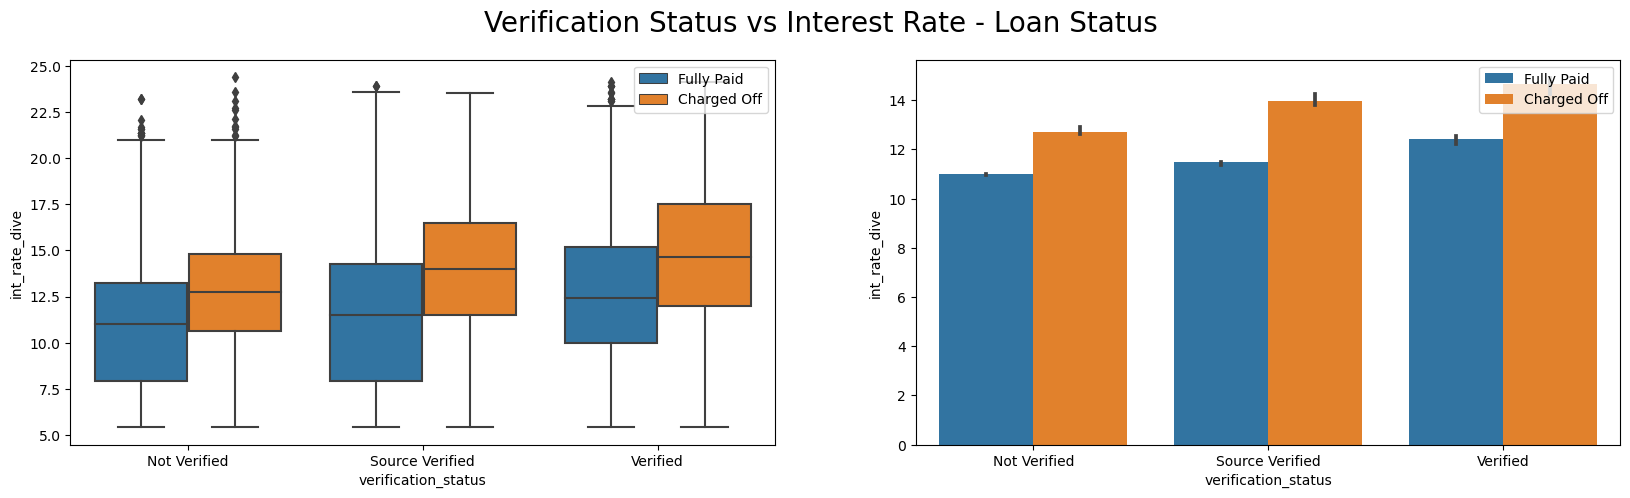

In [360]:
# Lets Check What the interest rates applied based on Verification Status for sanctioned loans
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x='verification_status', y='int_rate_dive', hue='loan_status', data=ld,hue_order = ['Fully Paid', 'Charged Off'] )
plt.legend(loc='upper right')
plt.subplot(1,2,2)
sns.barplot(x='verification_status', y='int_rate_dive', hue='loan_status', data=ld, hue_order = ['Fully Paid', 'Charged Off'], estimator=np.median)
plt.legend(loc='upper right')
plt.suptitle('Verification Status vs Interest Rate - Loan Status', size=20)
plt.show()

Observation :
- Defaulted (Charged Off) Loans have higher Interest Rates when compared to the Full Paid Loans.
- Loan Defaults are higher for higher interest rate, across Verification status

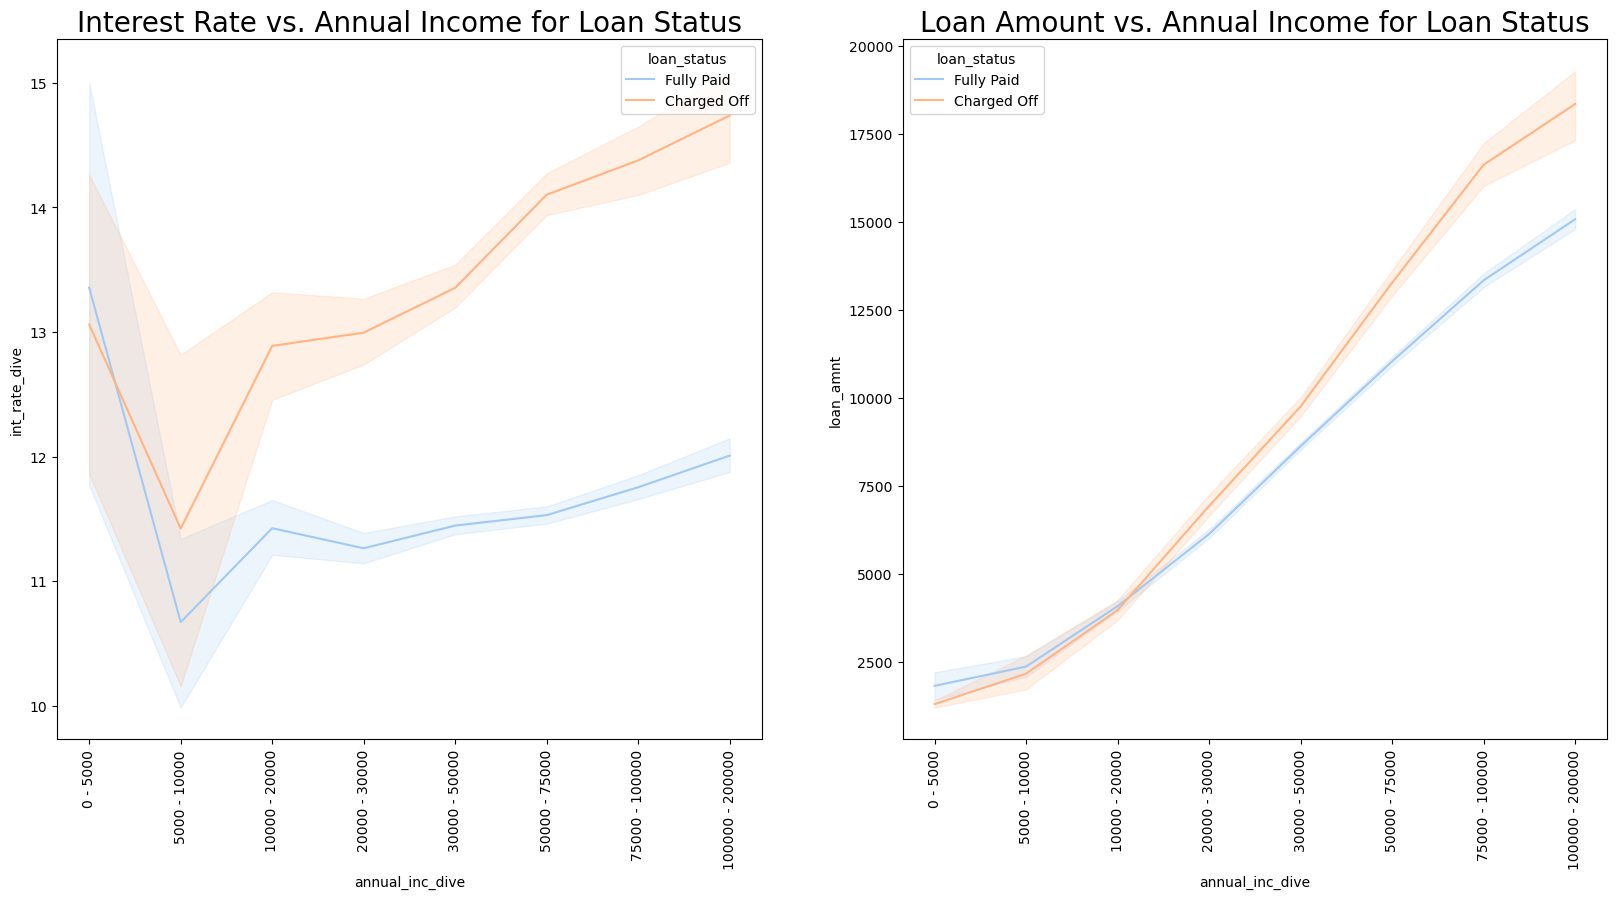

In [363]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.lineplot(data =ld,y='int_rate_dive', x='annual_inc_dive', hue ='loan_status', hue_order = ['Fully Paid', 'Charged Off'], palette="pastel")
plt.xticks(rotation=90)
plt.title('Interest Rate vs. Annual Income for Loan Status', size=20)
plt.subplot(2,2,2)
sns.lineplot(data =ld,y='loan_amnt', x='annual_inc_dive', hue ='loan_status', hue_order = ['Fully Paid', 'Charged Off'], palette="pastel")
plt.xticks(rotation=90)
plt.title('Loan Amount vs. Annual Income for Loan Status', size=20)
plt.show()

Observation :
- Interest Rate is consistently lower for rest of income groups in case of Fully Paid Loans, only exception being Income group < 5000.
- Interest Rate for Charged off loans is higher across all income groups, with an exception of 5k - 10k income group range.
- Loan Amount increase proportionally to the Annual Income. Indicating the higher the Annual Income, higher will be the Funded Loan Amount.
    - Also, indicates that with increase in both annual income and loan amount, there is increase in number of defaulted (Charged Off) loans.

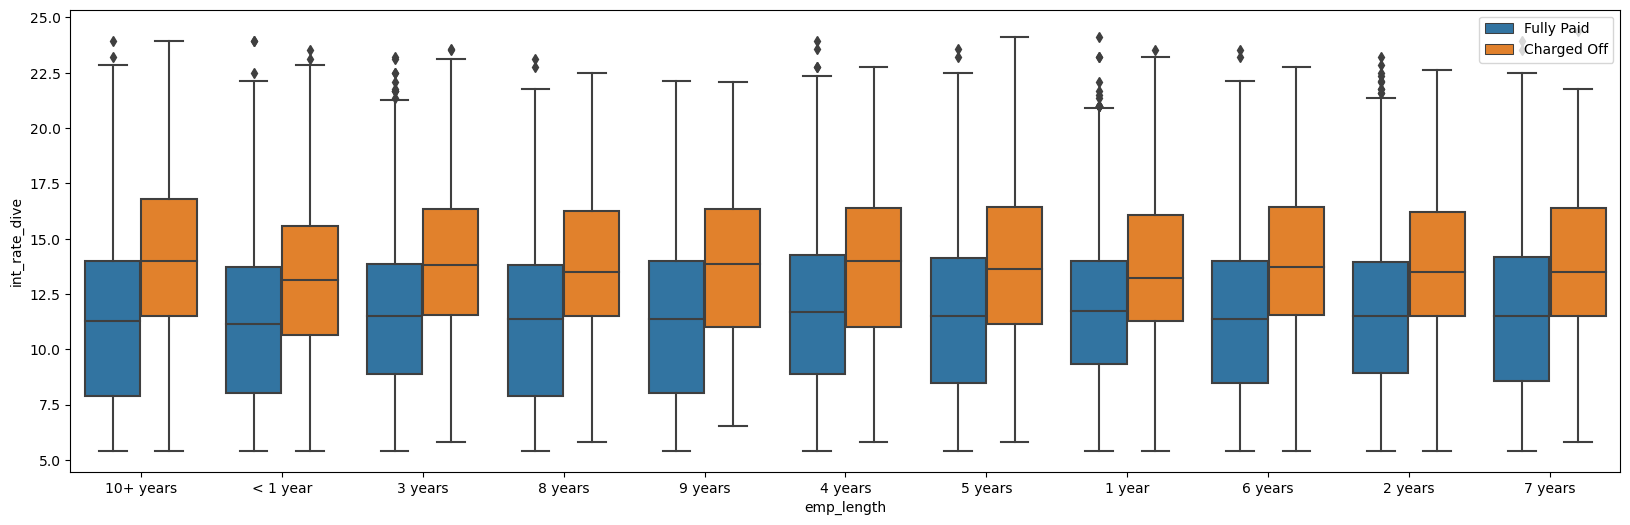

In [376]:
# Employment Length vs. Interest Rate vs. Loan Status
plt.figure(figsize=(20,6))
sns.boxplot(x='emp_length', y='int_rate_dive', hue='loan_status', data=ld, hue_order = ['Fully Paid', 'Charged Off'])
plt.legend(loc='upper right')
plt.show()

Observation
- Full Paid and Charged Off Loans are consistent across Employment Length.
- Interest Rates for Charged Off Loans is significantly higher than Fully Paid Loans.

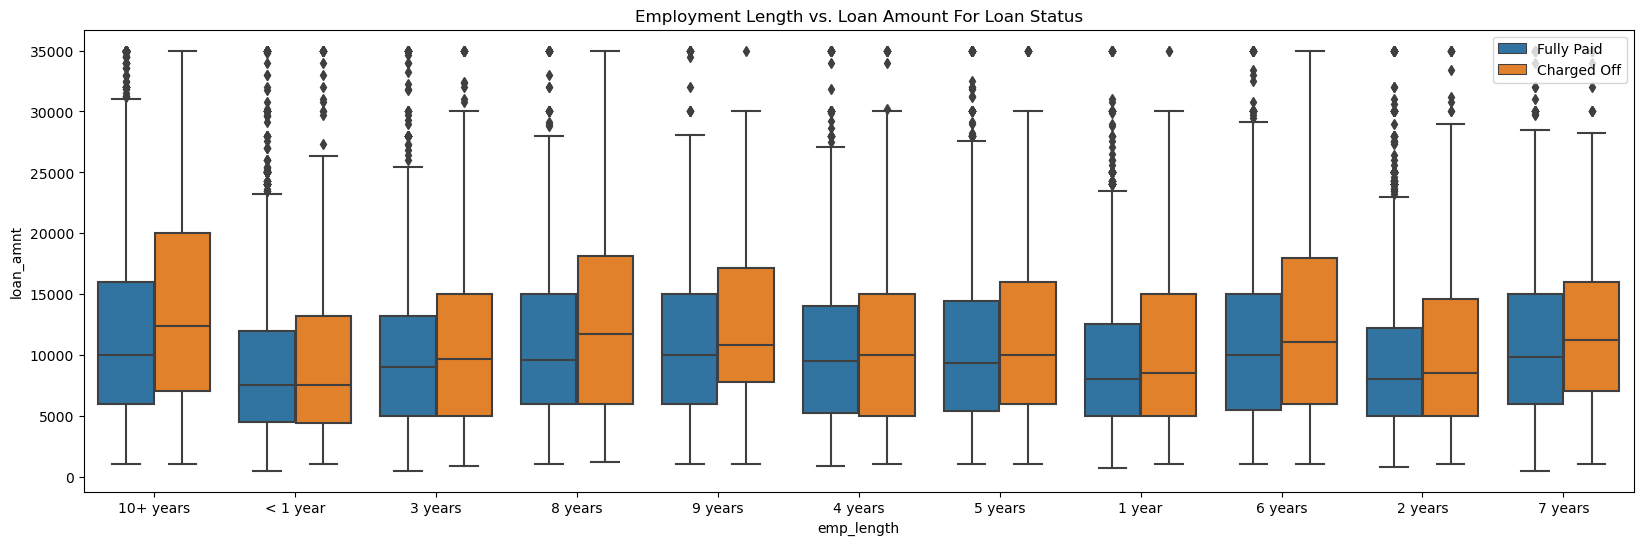

In [377]:
# Employment Length vs. Loan Amount vs. Loan Status
plt.figure(figsize=(20,6))
sns.boxplot(x='emp_length', y='loan_amnt', hue='loan_status', data=ld, hue_order = ['Fully Paid', 'Charged Off'])
plt.legend(loc='upper right')
plt.title('Employment Length vs. Loan Amount For Loan Status')
plt.show()

Observation
- Higher Experienced Loan Applicants are higher loan amount sanctioned and also have higher defaults

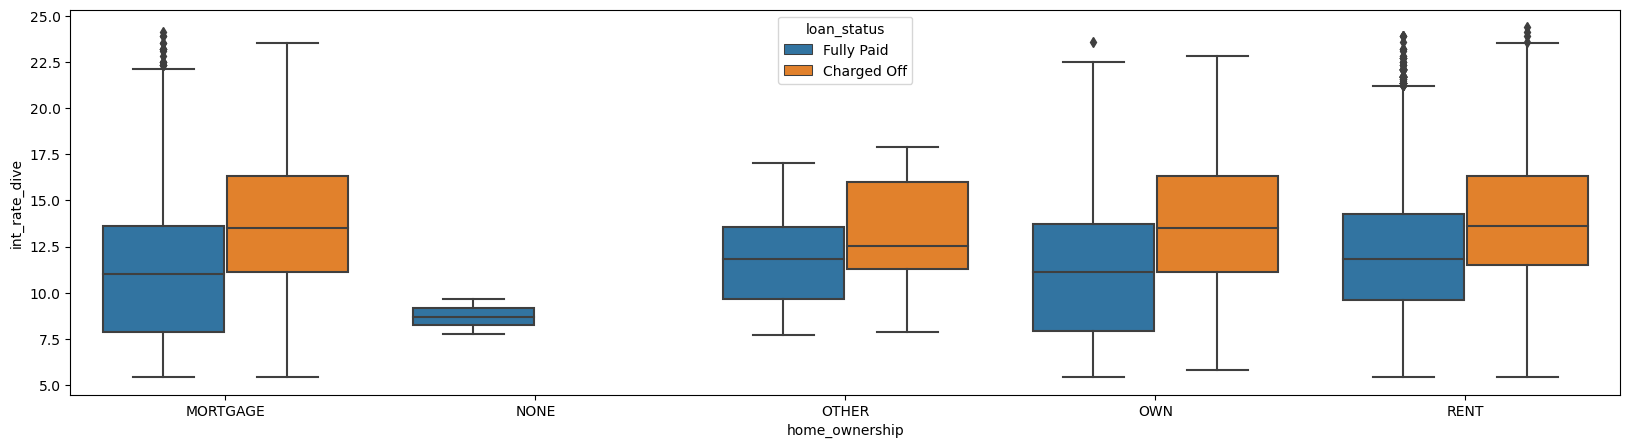

In [375]:
# Home Ownership vs. Interest Rates vs. Loan Status
plt.figure(figsize=(20,5))
sns.boxplot(x='home_ownership', y='int_rate_dive', hue='loan_status', data=ld, hue_order = ['Fully Paid', 'Charged Off'])
plt.show()

In [ ]:
Observation
- Higher Interest Rates for Charged Off Loans
- Fully Paid Loans have significantly lower interest rates than the Charged Off Loans.

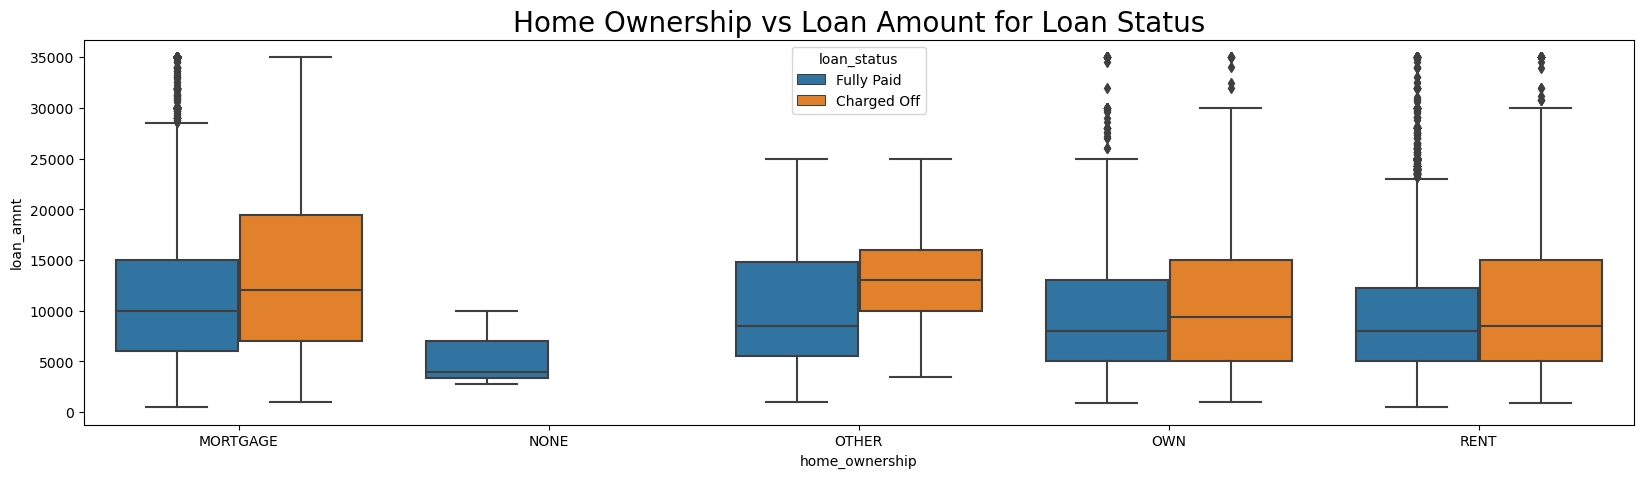

In [374]:
# Home Ownership vs. Loan Amount vs. Loan status
plt.figure(figsize=(20,5))
sns.boxplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=ld, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Home Ownership vs Loan Amount for Loan Status', size=20)
plt.show()

Observation :
- Loan Applicants with home mortgage have significantly higher loan amount.
- Loan Applicants with mortgages are significantly higher defaulters.

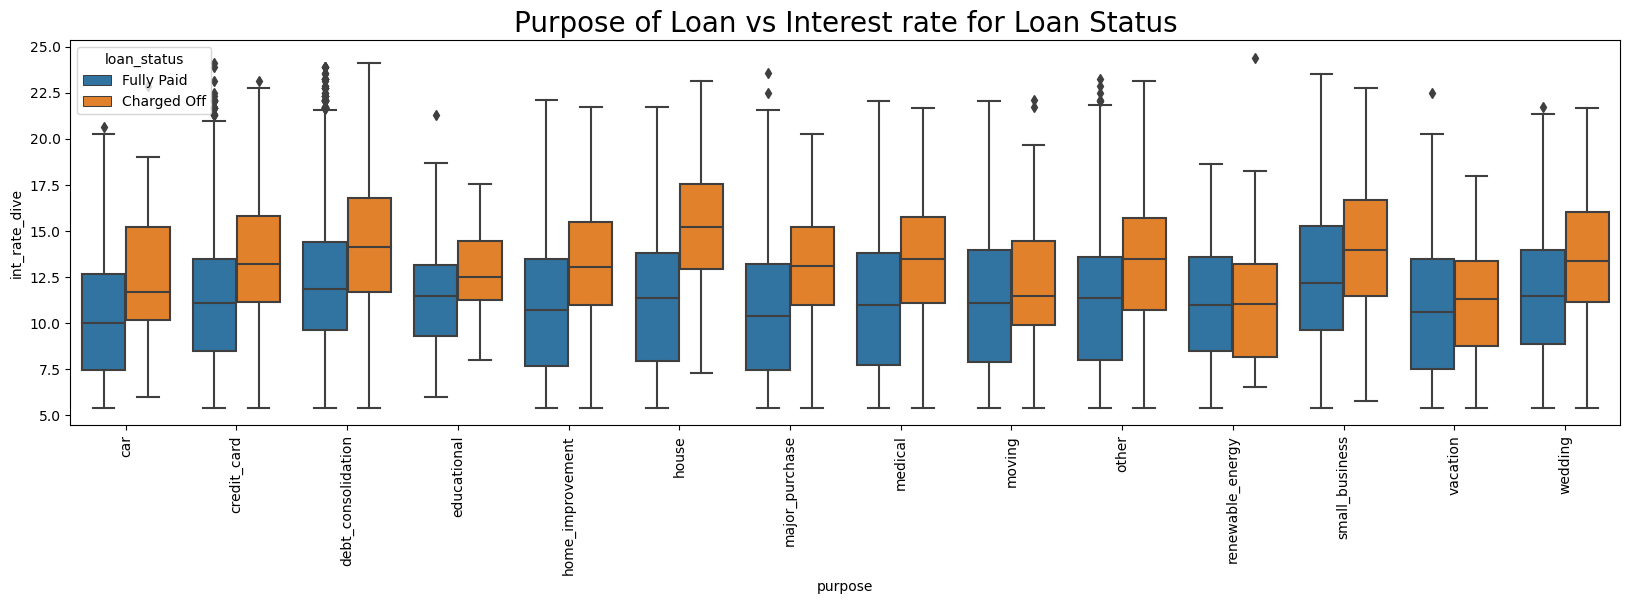

In [383]:
# Purpose of loan vs. interest rate vs. loan status
plt.figure(figsize=(20,5))
plt.title('Purpose of Loan vs Interest rate for Loan Status', size=20)
sns.boxplot(x='purpose', y='int_rate_dive', hue='loan_status', data= ld, hue_order = ['Fully Paid', 'Charged Off'])
plt.xticks(rotation=90)
plt.show()

Observation
- Interest is higher for Charged Off Loans, only exception being for 'renewable energy' purpose.

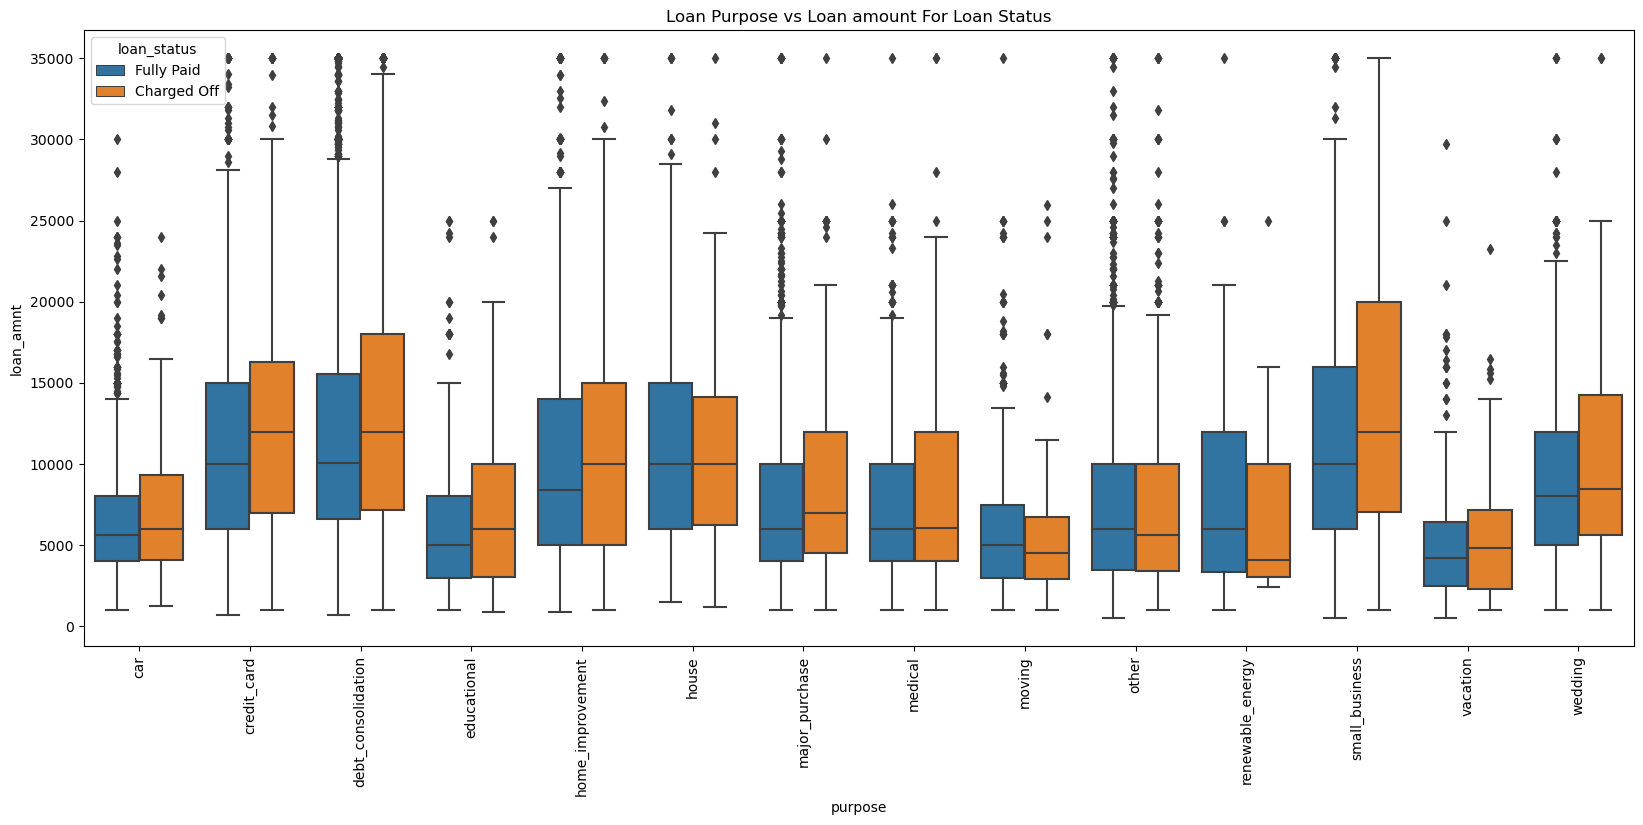

In [387]:
# Loan Amount vs. Purpose of loan vs. Loan Status
plt.figure(figsize=(20,8))
plt.title('Loan Purpose vs Loan amount For Loan Status')
sns.boxplot(x='purpose', y='loan_amnt', hue='loan_status', data= ld,hue_order = ['Fully Paid', 'Charged Off'] )
plt.xticks(rotation=90)
plt.show()

Observation :
- Debt Consolidate, Small Business and Credit card have higher loan amount sanctioned and also have charged off loans.
- Moving and Renewal Energy have more Fully Paid Loans.

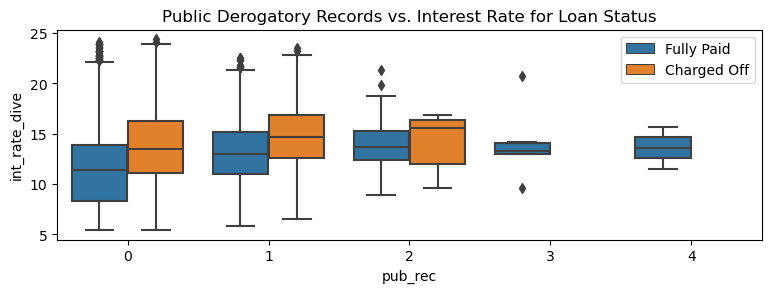

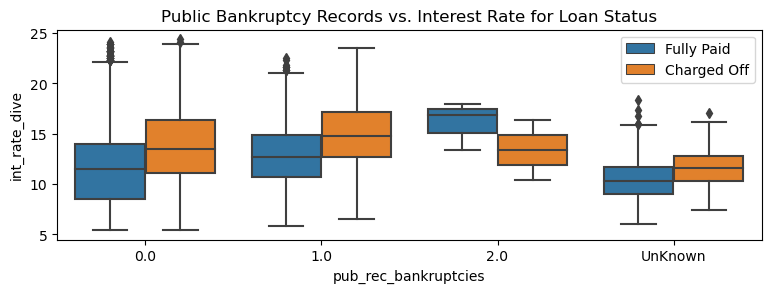

In [411]:
# Public Records vs. Interest Rate vs. Loan Status
plt.figure(figsize=(20,6))
plt.subplot(2,2,1)
sns.boxplot(x='pub_rec', y='int_rate_dive', hue='loan_status', data=ld, hue_order = ['Fully Paid', 'Charged Off'])
plt.legend(loc='upper right')
plt.title('Public Derogatory Records vs. Interest Rate for Loan Status')
plt.figure(figsize=(20,6))
plt.subplot(2,2,2)
sns.boxplot(x='pub_rec_bankruptcies', y='int_rate_dive', hue='loan_status', data=ld, hue_order = ['Fully Paid', 'Charged Off'])
plt.legend(loc='upper right')
plt.title('Public Bankruptcy Records vs. Interest Rate for Loan Status')
plt.show()

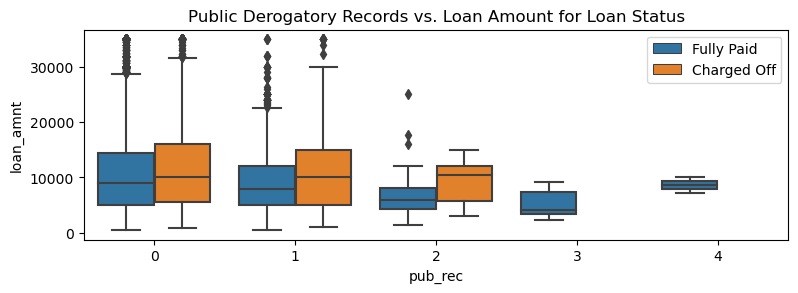

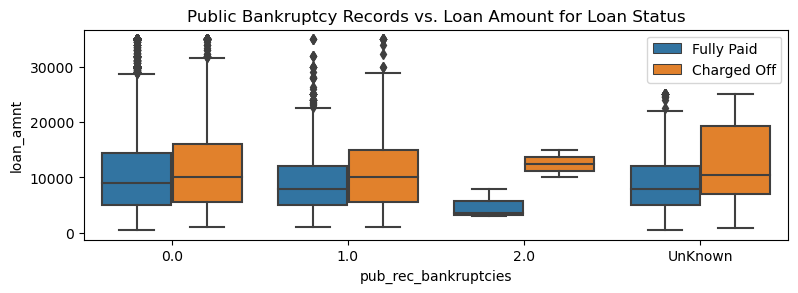

In [412]:
# Public Records vs. Loan Amount vs. Loan Status
plt.figure(figsize=(20,6))
plt.subplot(2,2,1)
sns.boxplot(x='pub_rec', y='loan_amnt', hue='loan_status', data=ld, hue_order = ['Fully Paid', 'Charged Off'])
plt.legend(loc='upper right')
plt.title('Public Derogatory Records vs. Loan Amount for Loan Status')
plt.figure(figsize=(20,6))
plt.subplot(2,2,2)
sns.boxplot(x='pub_rec_bankruptcies', y='loan_amnt', hue='loan_status', data=ld, hue_order = ['Fully Paid', 'Charged Off'])
plt.legend(loc='upper right')
plt.title('Public Bankruptcy Records vs. Loan Amount for Loan Status')
plt.show()

In [ ]:
Observation
- Charged-Off Loans are higher of individuals with Public Records.
- Charged Off Loans for applicant with 2 records is highest.
- High number of Loans do not have Public Records.

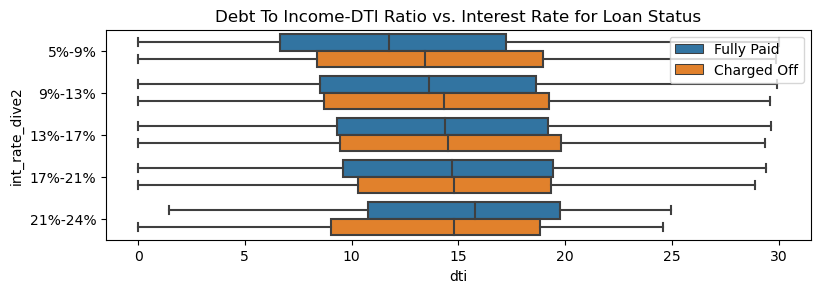

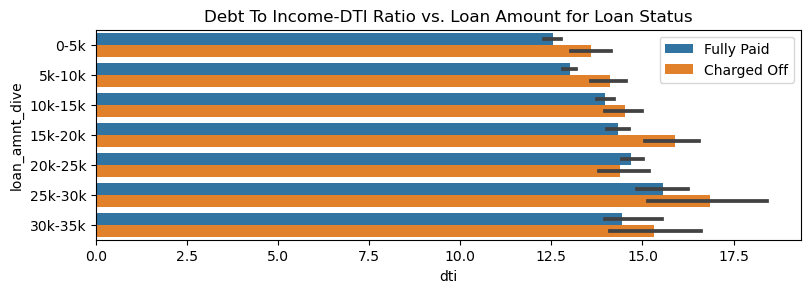

In [420]:
# DTI vs. Interest Rate vs. Loan Status
plt.figure(figsize=(20,6))
plt.subplot(2,2,1)
sns.boxplot(x='dti', y='int_rate_dive2', hue='loan_status', data=ld, hue_order = ['Fully Paid', 'Charged Off'])
plt.legend(loc='upper right')
plt.title('Debt To Income-DTI Ratio vs. Interest Rate for Loan Status')
# DTI vs. Loan Amount vs. Loan Status
plt.figure(figsize=(20,6))
plt.subplot(2,2,2)
sns.barplot(x='dti', y='loan_amnt_dive', hue='loan_status', data=ld, hue_order = ['Fully Paid', 'Charged Off'], estimator=np.median)
plt.legend(loc='upper right')
plt.title('Debt To Income-DTI Ratio vs. Loan Amount for Loan Status')
plt.show()

Observation 
- Charged Off Loans higher where the DTI ratio is high.

#### Correlation Heat Map for Loan Dataset

In [416]:
# Creating Dataframe for select columns for which we need headmap
corr_df = ld[['loan_amnt','funded_amnt_inv','annual_inc', 'dti', 'installment','pub_rec','pub_rec_bankruptcies_dive', 'revol_util_dive','emp_length_dive','open_acc','int_rate_dive', 'loan_status_dive']]

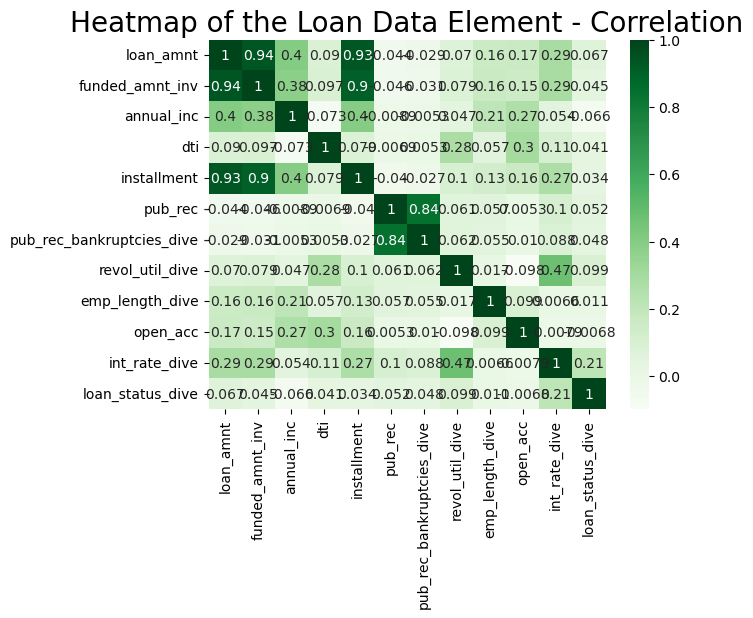

In [129]:
#Heatmap Creation / Generation
sns.heatmap(corr_df.corr(),annot=True, cmap='Greens')
plt.title('Heatmap of the Loan Data Element - Correlation', size=20)
plt.show()

#### Observation :
- Positive Correlation between Loan Amount, Investor Funded Anount and Installment.
- Positive Correlation for loan applicants with Public Derogatory records and Public Bankruptcy Records
- Interest Rate is higher for applicants with revolving line utilization rate (revolving credit line).

## !!****** End of Analysis**************************!!

## Observation Summary :

#### Univariate Analysis findings :
- Charged Off Loans constitute approx..15% of the overall loans sanctioned.
- 75% of the loans are sanctioned for the term of 36 Months
- Loan Amount varies from 500 to 35K and approx.. 80% of the loans are sanctioned for loan amount in range of 500 – 15K
- 73% of loans defaulted (Charged Off) are in the loan amount range of 500 – 15K.
- Applicants reside in rental homes
- Applicants who have mortagaged their homes
- Applicants Applying for loan with purpose of Debt Consolidation, i.e. applicants who use the loan to clear other debts
- Around 50% of the loans are sanctioned for interest range between 5% - 13%
- Around 50% of Charged Off Loans are in 13% - 21% interest rate range.
- Applicants who have an income of range 30k - 75k
- Applicants with employement length of 10+ years
- Average Installment is range of 270 – 280.
- Majority of Loan Applicants have annual income in range of 40k – 60k
- Majority of defaulted loan applicants have income range between 50k – 75%
- Majority of Loans are sanctioned for purpose of Debt Collection and same purpose has majority of loan defaulters.
- Majority of loan applicants do not have public records
- More than 50% of the loans are sanctioned for loan applicants with Grade A or B.
- Grade B and C have higher count of loan defaulters.
- Majority of Loan applicants have 10+ years of experience, 10+ years experience has higher default loans count.
- Majority of Loan applicants do not own house, have home ownership as Mortgage or Rent.
- Majority of Loan Applicants are from CA, FL, TX and NY. With CA leading the pack.
- Majority of Loan Applicants have debt to income ratio of 10 - 15. 
- Majority of defaulter have DTI ratio of 12 – 18.
- Loan sanctioned are in larger number during the last quarter of the year, also the defaulted loans show same trend.
- 50% of loans were sanctioned in 2011 year.
- Loans sanctioned increases exponentially YoY, upto 2x times, between 2007 to 2011, the defaulted loans also show the same trend.

#### Segmented Univariate Analysis:
Segmented Univariate Analysis
- 60 month term loans are more chance of defaulting loans, where as 36 month term loans have higher chance of being fully paid.
- Loans availed for purpose of Debt Consolidation have highest number of loans, also have highest number of Fully Paid and Charged Off Loans.
- 0.25 percentile is almost same for both Full Paid and Charged Loans, but the gap is higher at 0.75 percentile, indicating that higher loan amount are more likely to be defaulted.
- Loan applicants with DTI in range of 10 - 15 are more likely to default loan.
- Loan Applicants who do not own home (Mortgage & Rent) are high probability of defaulting loans
- Loan Applicant with Annual Income below <60k are most likely to default.
- Loan Applicant with 10+ years of experience is more likely to default, but also have higher chance of Fully Paying the loan.
- Charged Off (Default) loans increase with interest rate, then gradually declines after hitting 17.5% interest rate.
- Both Fully Paid and Charged Off Loans are increase exponentially YoY from year 2007 to 2011. With 2011 accounting for around 53% of loans.
- Grade A and B have highest number of Fully Paid Loans, while Grade B and C have higher count of Charged Off Loans

#### Bivariate Analysis
- Interest Rate for Charged Off Loans is higher than the Fully Paid loans for both 36 months and 60 months term. Indicates that loans with higher interest rate are more likely to be defaulted.
- Charged Off loans are lower for Grade A, the defaulted loans steadily increase as we move from higher grades to lower grades.
- Higher Grades have lower loan amount and interest rates than lower grades, this indicates that lower the grade higher the risk and hence higher interest rates. Also, the fact that lower grades have higher loan amount sanctioned.
- Even though the loan applicants whose Source of Income is not verified is higher, the defaulted loans are higher for loan applicants whose source of income is verified.
- Higher Annual Income loan applicants are higher interest rates and are also sanctioned higher loan amounts. But as the loan amount increases the number of default loans also increase. Hence it can be inferred that Higher Loan amount with high interest rates are more likely to be defaulted.
- Loan availed with a purpose of Debt Consolidation, Small Business and Credit Card are top three loan defaulters. 
- Loan applicants with public records (Derogatory or Bankruptcy) and with higher loan amounts & Interest Rates are more likely to default.
- Loan Applicants whose Public Records are not known have higher defaulted loans, indicating that Public records are one of key indicator.
- Generic Trend noticed is Higher Loan amount with higher interest rates are more likely to defaulted.

## Recommendations
##### Following are Recommendations based on the analysis of charged off loans. The probability of defaulting is high when:
- Loan Applicants in lower Grades seeking loan amount > 15K and interest rate > 10%.
- Loan Applicants not owing home (Mortgage or Rent) and have high Annual Income Range (60K - 70K)
- Loans with interest rates between 9% - 17%
- Applicants with Annual Income range between 35k - 70k and availing loan for Debt Consolidation.
- Loan Applicants with Public Records (Derogatory / Bankruptcy) not known.
- Loan Applicants with Public records (Derogatory / Bankruptcy), with loan amount >10k or interest rate > 10%
- Loan Applicants irrespective of the Verified status, with loan sanction is >=10K and interest rate >10%.
- Loan Applicants with >10 years of experience and with loan amount > 10K or with interest rate (>10%)
- Loan Applicants with purpose of Debt Consolidation or Small Business, with loan amount >=14K or   with interest rate > 10%
- Loan Applicants with high DTI (Debt to Income) ratio.
- Loan Applicants from state CA, FL, TX and NY

#### Driving Factors / Indicators for Loan Defaulters:
- Grades, Annual Income, DTI , Public Record (Derogatory / Bankruptcy), Purpose of Loan, Loan Amount, Interest Rate
- Note - DTI should ideally cover Home Ownership - Mortgages & Rent, if not these can be added as key indicators.